# Chemical Process Anomaly Detection
---
## Table of contents
[**0. Project initalization**](#0-project-initalization)  
[**1. Data Description**](#1-data-description)  
[**2. EDA**](#2-eda)


## 0. Project initalization
---

In [1]:
import random

import pandas as pd
import numpy as np

from pathlib import Path

In [2]:
RANDOM_SEED = 42
DATA_PATH = Path("../../data")

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [3]:
train_data = pd.read_csv(DATA_PATH / "train.csv")
test_data = pd.read_csv(DATA_PATH / "test.csv")

In [80]:
train_data

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  \
0               0.0            1.0       1  0.25038   3674.0   4529.0   
1               0.0            1.0       2  0.25109   3659.4   4556.6   
2               0.0            1.0       3  0.25038   3660.3   4477.8   
3               0.0            1.0       4  0.24977   3661.3   4512.1   
4               0.0            1.0       5  0.29405   3679.0   4497.0   
...             ...            ...     ...      ...      ...      ...   
249995          0.0          500.0     496  0.29325   3640.1   4473.0   
249996          0.0          500.0     497  0.29134   3625.7   4506.2   
249997          0.0          500.0     498  0.29438   3600.2   4478.3   
249998          0.0          500.0     499  0.25269   3683.5   4486.4   
249999          0.0          500.0     500  0.25214   3648.2   4467.8   

        xmeas_4  xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4  \
0        9.2320   26.889   42.402   2704.3  ...  53.744  24.657  62.544   
1        9.4264   26.721   42.576   2705.0  ...  53.414  24.588  59.259   
2        9.4426   26.875   42.070   2706.2  ...  54.357  24.666  61.275   
3        9.4776   26.758   42.063   2707.2  ...  53.946  24.725  59.856   
4        9.3381   26.889   42.650   2705.1  ...  53.658  28.797  60.717   
...         ...      ...      ...      ...  ...     ...     ...     ...   
249995   9.1949   26.867   42.379   2700.2  ...  53.429  29.249  60.773   
249996   9.2109   26.889   42.291   2700.6  ...  53.830  28.975  61.517   
249997   9.1957   26.820   42.448   2700.3  ...  54.163  28.676  61.656   
249998   9.2832   27.188   42.757   2697.4  ...  53.453  24.889  61.564   
249999   9.1344   26.886   42.534   2695.1  ...  53.676  24.943  61.254   

         xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0       22.137  39.935  42.323  47.757  47.510  41.258  18.447  
1       22.084  40.176  38.554  43.692  47.427  41.359  17.194  
2       22.380  40.244  38.990  46.699  47.468  41.199  20.530  
3       22.277  40.257  38.072  47.541  47.658  41.643  18.089  
4       21.947  39.144  41.955  47.645  47.346  41.507  18.461  
...        ...     ...     ...     ...     ...     ...     ...  
249995  21.532  40.451  34.064  48.953  48.291  40.812  18.756  
249996  21.750  42.762  42.645  51.055  48.589  40.933  19.360  
249997  21.487  42.109  39.770  46.770  48.648  41.465  19.344  
249998  21.392  39.334  42.274  43.623  48.797  39.835  18.512  
249999  21.208  38.991  42.873  44.400  48.876  41.076  16.158  

[250000 rows x 55 columns]

In [81]:
test_data

sample  simulationRun  xmeas_1  xmeas_10  xmeas_11  xmeas_12  \
0            1            151  0.24927   0.33775    80.122    50.119   
1            2            151  0.25248   0.33964    80.075    49.453   
2            3            151  0.25116   0.33801    80.147    48.533   
3            4            151  0.24815   0.33556    80.163    48.250   
4            5            151  0.23961   0.32149    80.138    48.410   
...        ...            ...      ...       ...       ...       ...   
710395     956            438  0.00000   0.20767    72.732    50.324   
710396     957            438  0.00000   0.20767    72.732    50.324   
710397     958            438  0.00000   0.20767    72.732    50.324   
710398     959            438  0.00000   0.20767    72.732    50.324   
710399     960            438  0.00000   0.20767    72.732    50.324   

        xmeas_13  xmeas_14  xmeas_15  xmeas_16  ...     xmv_10  xmv_11  \
0         2632.7    25.883    50.561    3101.9  ...  40.319000  16.011   
1         2632.4    25.949    51.504    3101.8  ...  41.286000  20.370   
2         2633.3    25.131    51.688    3102.2  ...  41.210000  16.036   
3         2632.3    23.923    49.509    3102.8  ...  41.183000  15.611   
4         2632.6    23.388    49.588    3102.2  ...  41.701000  16.618   
...          ...       ...       ...       ...  ...        ...     ...   
710395    2920.8    25.377    49.508    3443.4  ...  -0.025274  18.598   
710396    2920.8    25.377    49.508    3443.4  ...  -0.025311  18.594   
710397    2920.8    25.377    49.508    3443.4  ...  -0.025349  18.589   
710398    2920.8    25.377    49.508    3443.4  ...  -0.025386  18.584   
710399    2920.8    25.377    49.508    3443.4  ...  -0.025423  18.579   

         xmv_2    xmv_3    xmv_4    xmv_5    xmv_6   xmv_7   xmv_8    xmv_9  
0       53.877   24.767   62.495   22.050  39.9870  38.451  47.832   47.427  
1       53.926   24.452   58.961   21.920  39.7560  36.490  50.014   47.059  
2       54.323   24.588   60.385   22.270  39.9540  33.784  50.440   47.592  
3       54.171   24.885   63.593   22.068  40.2530  32.951  45.397   47.591  
4       53.690   23.879   61.476   21.861  38.2170  33.422  45.579   47.524  
...        ...      ...      ...      ...      ...     ...     ...      ...  
710395  41.967  100.000  100.000  100.020   1.7372  39.055  45.394  100.410  
710396  43.628  100.000  100.000  100.020   0.0000  39.055  45.394  100.410  
710397  43.628  100.000  100.000  100.020   0.0000  39.055  45.394  100.410  
710398  41.859  100.000  100.000  100.020   1.7723  39.055  45.394  100.410  
710399  41.859  100.000  100.000  100.020   1.7723  39.055  45.394  100.410  

[710400 rows x 54 columns]

## 1. Data Description
---

각 column의 의미는 다음과 같습니다.
- `faultNumber` : 정상인지, 비정상인지 나타내는 Label 입니다. 정상일 경우 `0`, 비정상일 경우 `1` 입니다.
- `simulationRun` : 시뮬레이션이 실행된 Run 의 번호 입니다. 
  - 동일한 하나의 `simulationRun` 이 정상일 경우 `faultNumber` 가 모두 `0` 입니다.
  - 반대로 하나의 `simulationRun` 이 비정상일 경우 `faultNumber` 가 모두 `1` 입니다.
  - 학습 데이터에는 정상 데이터만 존재합니다. 따라서 `faultNumber` 가 모두 `0` 입니다.
  - 테스트 데이터에는 정상/비정상 데이터가 모두 존재합니다. 따라서 `faultNumber` 가 모두 `0`인 `simulationRun` 도 있고, `faultNumber` 모두 `1`인 `simulationRun` 도 있습니다.
- `sample` : 하나의 Run 안의 sample 번호를 의미합니다. 학습 데이터는 한 Run 당 500 sample 이 있습니다.(1~500)
- `xmeas_*` : measurement 의 약자로, 화학 공정에서 측정된 센서 값 입니다.
- `xmv_*` : manipulated variable 의 약자로, 화학 공정에서 제어되는 값 입니다.
    - measurement 와 manipulated 관련 설명은 [다음 자료](https://chemicalada.blogspot.com/2016/02/classification-of-variables-in-chemical.html)를 참고하시기 바랍니다.  
  
`manipulated variable`는 화학 공정에서 제어되는 값인 독립변수이다. 즉, 공정 측에서 인위적으로 변경할 수 있는 값이다. `measurement`는 화학 공정에서 `manipulated variable`로 인해 나타나는 종속변수이다. 즉, `manipulated variable`로 인한 결과이다.

`가스버너로 예를 들면 manipulated variable이 불의 세기라면 measurement는 가열 온도이다.`

### Wrangiling

In [4]:
def wrangiling(data_set):
    print("==================")
    print("       Shape      ")
    print("==================")

    display(data_set.shape)

    print("==================")
    print("        Info      ")
    print("==================")

    display(data_set.info())

    print("==================")
    print("      Columns     ")
    print("==================")
    
    display(data_set.columns)

    print("==================")
    print("        NaN       ")
    print("==================")

    display(data_set.isna().sum())

    print("==================")
    print("     Duplicated   ")
    print("==================")
    
    display(data_set[data_set.duplicated()])

    print("==================")
    print("    Description   ")
    print("==================")

    display(data_set.describe())

    print("==================")
    print("      Unique      ")
    print("==================")

    display(data_set.nunique())

In [5]:
wrangiling(data_set=train_data)

       Shape      


(250000, 55)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    250000 non-null  float64
 1   simulationRun  250000 non-null  float64
 2   sample         250000 non-null  int64  
 3   xmeas_1        250000 non-null  float64
 4   xmeas_2        250000 non-null  float64
 5   xmeas_3        250000 non-null  float64
 6   xmeas_4        250000 non-null  float64
 7   xmeas_5        250000 non-null  float64
 8   xmeas_6        250000 non-null  float64
 9   xmeas_7        250000 non-null  float64
 10  xmeas_8        250000 non-null  float64
 11  xmeas_9        250000 non-null  float64
 12  xmeas_10       250000 non-null  float64
 13  xmeas_11       250000 non-null  float64
 14  xmeas_12       250000 non-null  float64
 15  xmeas_13       250000 non-null  float64
 16  xmeas_14       250000 non-null  float64
 17  xmeas_15  

None

      Columns     


Index(['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2',
       'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11'],
      dtype='object')

        NaN       


faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

     Duplicated   


Empty DataFrame
Columns: [faultNumber, simulationRun, sample, xmeas_1, xmeas_2, xmeas_3, xmeas_4, xmeas_5, xmeas_6, xmeas_7, xmeas_8, xmeas_9, xmeas_10, xmeas_11, xmeas_12, xmeas_13, xmeas_14, xmeas_15, xmeas_16, xmeas_17, xmeas_18, xmeas_19, xmeas_20, xmeas_21, xmeas_22, xmeas_23, xmeas_24, xmeas_25, xmeas_26, xmeas_27, xmeas_28, xmeas_29, xmeas_30, xmeas_31, xmeas_32, xmeas_33, xmeas_34, xmeas_35, xmeas_36, xmeas_37, xmeas_38, xmeas_39, xmeas_40, xmeas_41, xmv_1, xmv_2, xmv_3, xmv_4, xmv_5, xmv_6, xmv_7, xmv_8, xmv_9, xmv_10, xmv_11]
Index: []

[0 rows x 55 columns]

    Description   


faultNumber  simulationRun         sample        xmeas_1  \
count     250000.0  250000.000000  250000.000000  250000.000000   
mean           0.0     250.500000     250.500000       0.250482   
std            0.0     144.337567     144.337567       0.030873   
min            0.0       1.000000       1.000000       0.122450   
25%            0.0     125.750000     125.750000       0.229770   
50%            0.0     250.500000     250.500000       0.250510   
75%            0.0     375.250000     375.250000       0.271200   
max            0.0     500.000000     500.000000       0.391740   

             xmeas_2       xmeas_3        xmeas_4        xmeas_5  \
count  250000.000000  250000.00000  250000.000000  250000.000000   
mean     3663.785706    4508.81979       9.347101      26.902196   
std        34.006357      39.21542       0.085721       0.211485   
min      3511.800000    4336.90000       8.972700      25.951000   
25%      3640.800000    4482.40000       9.289300      26.758000   
50%      3663.700000    4508.80000       9.347100      26.902000   
75%      3686.800000    4535.30000       9.405100      27.046000   
max      3808.400000    4683.70000       9.729800      27.818000   

             xmeas_6        xmeas_7  ...          xmv_2          xmv_3  \
count  250000.000000  250000.000000  ...  250000.000000  250000.000000   
mean       42.337598    2705.037865  ...      53.973668      24.639472   
std         0.218513       7.525596  ...       0.469663       3.037743   
min        41.394000    2672.300000  ...      52.095000      11.977000   
25%        42.188000    2700.100000  ...      53.657000      22.602000   
50%        42.338000    2705.000000  ...      53.974000      24.644000   
75%        42.487000    2710.000000  ...      54.290000      26.674000   
max        43.257000    2739.100000  ...      56.118000      38.351000   

               xmv_4          xmv_5          xmv_6          xmv_7  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean       61.298501      22.216644      40.055456      38.098898   
std         1.243805       0.530156       1.526751       2.965266   
min        55.961000      19.749000      33.389000      25.959000   
25%        60.453000      21.864000      39.021000      36.081000   
50%        61.298000      22.217000      40.058000      38.091000   
75%        62.144000      22.568000      41.084000      40.117000   
max        66.443000      24.525000      47.498000      50.729000   

               xmv_8          xmv_9         xmv_10         xmv_11  
count  250000.000000  250000.000000  250000.000000  250000.000000  
mean       46.534295      47.958591      41.104304      18.118706  
std         2.351304       2.716520       0.540817       1.463678  
min        36.937000      36.641000      38.586000      11.705000  
25%        44.931000      46.265000      40.740000      17.130000  
50%        46.530000      47.820000      41.104000      18.119000  
75%        48.140000      49.651000      41.470000      19.111000  
max        56.443000      59.616000      43.930000      24.762000  

[8 rows x 55 columns]

      Unique      


faultNumber          1
simulationRun      500
sample             500
xmeas_1          17399
xmeas_2           2384
xmeas_3           2717
xmeas_4           5539
xmeas_5           1500
xmeas_6           1541
xmeas_7            599
xmeas_8           3609
xmeas_9             18
xmeas_10          7782
xmeas_11          1745
xmeas_12          6287
xmeas_13           626
xmeas_14          6428
xmeas_15          6357
xmeas_16           518
xmeas_17          4106
xmeas_18          3021
xmeas_19          6884
xmeas_20          1230
xmeas_21          1016
xmeas_22          1885
xmeas_23          1946
xmeas_24          6070
xmeas_25          2094
xmeas_26          6246
xmeas_27          1961
xmeas_28          1683
xmeas_29          2227
xmeas_30           778
xmeas_31          2545
xmeas_32          6137
xmeas_33          2206
xmeas_34          1764
xmeas_35          4119
xmeas_36          3349
xmeas_37         30719
xmeas_38          8856
xmeas_39         17650
xmeas_40          2894
xmeas_41   

In [6]:
wrangiling(test_data)

       Shape      


(710400, 54)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710400 entries, 0 to 710399
Data columns (total 54 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample         710400 non-null  int64  
 1   simulationRun  710400 non-null  int64  
 2   xmeas_1        710400 non-null  float64
 3   xmeas_10       710400 non-null  float64
 4   xmeas_11       710400 non-null  float64
 5   xmeas_12       710400 non-null  float64
 6   xmeas_13       710400 non-null  float64
 7   xmeas_14       710400 non-null  float64
 8   xmeas_15       710400 non-null  float64
 9   xmeas_16       710400 non-null  float64
 10  xmeas_17       710400 non-null  float64
 11  xmeas_18       710400 non-null  float64
 12  xmeas_19       710400 non-null  float64
 13  xmeas_2        710400 non-null  float64
 14  xmeas_20       710400 non-null  float64
 15  xmeas_21       710400 non-null  float64
 16  xmeas_22       710400 non-null  float64
 17  xmeas_23  

None

      Columns     


Index(['sample', 'simulationRun', 'xmeas_1', 'xmeas_10', 'xmeas_11',
       'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17',
       'xmeas_18', 'xmeas_19', 'xmeas_2', 'xmeas_20', 'xmeas_21', 'xmeas_22',
       'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28',
       'xmeas_29', 'xmeas_3', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33',
       'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39',
       'xmeas_4', 'xmeas_40', 'xmeas_41', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmv_1', 'xmv_10', 'xmv_11', 'xmv_2', 'xmv_3',
       'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9'],
      dtype='object')

        NaN       


sample           0
simulationRun    0
xmeas_1          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_2          0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_3          0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_4          0
xmeas_40         0
xmeas_41         0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmv_1            0
xmv_10           0
xmv_11           0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8       

     Duplicated   


Empty DataFrame
Columns: [sample, simulationRun, xmeas_1, xmeas_10, xmeas_11, xmeas_12, xmeas_13, xmeas_14, xmeas_15, xmeas_16, xmeas_17, xmeas_18, xmeas_19, xmeas_2, xmeas_20, xmeas_21, xmeas_22, xmeas_23, xmeas_24, xmeas_25, xmeas_26, xmeas_27, xmeas_28, xmeas_29, xmeas_3, xmeas_30, xmeas_31, xmeas_32, xmeas_33, xmeas_34, xmeas_35, xmeas_36, xmeas_37, xmeas_38, xmeas_39, xmeas_4, xmeas_40, xmeas_41, xmeas_5, xmeas_6, xmeas_7, xmeas_8, xmeas_9, xmv_1, xmv_10, xmv_11, xmv_2, xmv_3, xmv_4, xmv_5, xmv_6, xmv_7, xmv_8, xmv_9]
Index: []

[0 rows x 54 columns]

    Description   


sample  simulationRun        xmeas_1       xmeas_10  \
count  710400.000000  710400.000000  710400.000000  710400.000000   
mean      480.500000     369.500000       0.249465       0.341095   
std       277.128174     213.619555       0.083627       0.054919   
min         1.000000       0.000000      -0.003384       0.031363   
25%       240.750000     184.750000       0.225920       0.327170   
50%       480.500000     369.500000       0.250260       0.336840   
75%       720.250000     554.250000       0.273970       0.346450   
max       960.000000     739.000000       1.016700       0.802510   

            xmeas_11       xmeas_12       xmeas_13       xmeas_14  \
count  710400.000000  710400.000000  710400.000000  710400.000000   
mean       79.953159      49.986619    2641.728123      25.122148   
std         1.157381       1.004389      53.145656       1.071866   
min        69.702000      45.411000    2370.600000      19.903000   
25%        79.912000      49.289000    2627.600000      24.424000   
50%        80.103000      49.995000    2633.700000      25.138000   
75%        80.288000      50.663000    2640.000000      25.840000   
max        86.631000      55.481000    2944.700000      31.182000   

            xmeas_15       xmeas_16  ...         xmv_10         xmv_11  \
count  710400.000000  710400.000000  ...  710400.000000  710400.000000   
mean       49.978389    3110.263553  ...      41.259162      18.557391   
std         1.015070      51.116985  ...       7.381448       4.632228   
min        45.226000    2898.600000  ...      -0.235790      -0.002547   
25%        49.285000    3097.400000  ...      40.702000      17.144000   
50%        49.962000    3102.300000  ...      41.117000      18.201000   
75%        50.671000    3107.500000  ...      41.538000      19.295000   
max        54.792000    3449.200000  ...     100.230000     100.010000   

               xmv_2          xmv_3          xmv_4          xmv_5  \
count  710400.000000  710400.000000  710400.000000  710400.000000   
mean       54.433897      25.987605      62.379721      23.152410   
std         5.269215      11.779155       5.901141       9.787915   
min        21.135000      -0.142390      30.795000      -0.061391   
25%        53.625000      22.393000      60.446000      21.772000   
50%        53.982000      24.735500      61.383000      22.193000   
75%        54.346000      27.120000      62.362000      22.610000   
max       100.000000     100.110000     100.020000     100.070000   

               xmv_6          xmv_7          xmv_8          xmv_9  
count  710400.000000  710400.000000  710400.000000  710400.000000  
mean       39.815532      38.060625      46.483987      48.282547  
std         8.796930       2.955771       2.349162      11.511533  
min         0.000000      24.594000      35.486000      -0.654130  
25%        38.838000      36.006000      44.879000      45.850000  
50%        40.027000      38.085000      46.445000      47.863000  
75%        41.201000      40.050000      48.087000      50.153000  
max        95.638000      54.230000      57.625000     100.490000  

[8 rows x 54 columns]

      Unique      


sample             960
simulationRun      740
xmeas_1          47471
xmeas_10         27801
xmeas_11          9466
xmeas_12          6867
xmeas_13          4575
xmeas_14          7324
xmeas_15          6967
xmeas_16          4137
xmeas_17          4594
xmeas_18         13978
xmeas_19         30697
xmeas_2           3308
xmeas_20          7770
xmeas_21          7848
xmeas_22          9372
xmeas_23          9618
xmeas_24         14551
xmeas_25          9070
xmeas_26          9820
xmeas_27          7786
xmeas_28          8156
xmeas_29         12441
xmeas_3           8446
xmeas_30          2922
xmeas_31         11505
xmeas_32         14625
xmeas_33          9505
xmeas_34          8755
xmeas_35         16708
xmeas_36         11197
xmeas_37         54435
xmeas_38         19233
xmeas_39         28073
xmeas_4          17246
xmeas_40          3751
xmeas_41          3907
xmeas_5           1904
xmeas_6           2772
xmeas_7           4412
xmeas_8          10774
xmeas_9            126
xmv_1      

### Unique Columns

In [83]:
def unique_cols(data_set):
    for col in data_set.columns:
        print(f" == {col} ==")
        display(data_set[col].unique())

In [84]:
unique_cols(data_set=train_data)

 == faultNumber ==


array([0.])

 == simulationRun ==


array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

 == sample ==


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

 == xmeas_1 ==


array([0.25038, 0.25109, 0.24977, ..., 0.16857, 0.32074, 0.33465])

 == xmeas_2 ==


array([3674. , 3659.4, 3660.3, ..., 3777.6, 3558. , 3780.5])

 == xmeas_3 ==


array([4529. , 4556.6, 4477.8, ..., 4373.1, 4630.5, 4651.4])

 == xmeas_4 ==


array([9.232 , 9.4264, 9.4426, ..., 9.6266, 9.1062, 9.6084])

 == xmeas_5 ==


array([26.889, 26.721, 26.875, ..., 27.63 , 27.681, 26.111])

 == xmeas_6 ==


array([42.402, 42.576, 42.07 , ..., 41.566, 41.601, 41.621])

 == xmeas_7 ==


array([2704.3, 2705. , 2706.2, 2707.2, 2705.1, 2703.8, 2704. , 2704.9,
       2703.2, 2705.3, 2703.9, 2702.1, 2702.5, 2706.8, 2703.7, 2696.1,
       2695.5, 2699.2, 2701.5, 2701.2, 2699.8, 2699.6, 2700.5, 2700. ,
       2697.8, 2699.5, 2696.8, 2696.9, 2698.9, 2697.2, 2695.8, 2698.4,
       2696.6, 2695. , 2696. , 2697.1, 2697.6, 2696.2, 2694.5, 2696.5,
       2696.7, 2694.7, 2694.4, 2694.8, 2696.3, 2698. , 2701.8, 2700.6,
       2699.4, 2699.1, 2697.7, 2702.3, 2699.7, 2710.1, 2713.2, 2710.2,
       2703.6, 2704.1, 2701.6, 2703.1, 2703. , 2704.5, 2701.7, 2699.9,
       2700.1, 2702. , 2700.7, 2697.9, 2695.7, 2698.5, 2700.4, 2704.7,
       2706.7, 2708.2, 2702.9, 2703.3, 2701. , 2705.5, 2709.7, 2709.1,
       2709.8, 2711.3, 2707.3, 2707.8, 2709.5, 2712.9, 2712.7, 2713.6,
       2707.4, 2708. , 2710.4, 2711.5, 2711.7, 2713.3, 2714.6, 2713.4,
       2708.5, 2707.5, 2710. , 2709.4, 2710.8, 2708.7, 2706.4, 2702.6,
       2704.2, 2704.6, 2706.1, 2706.3, 2705.6, 2700.8, 2701.4, 2695.3,
      

 == xmeas_8 ==


array([74.863, 75.   , 74.771, ..., 76.603, 73.211, 76.976])

 == xmeas_9 ==


array([120.41, 120.42, 120.39, 120.37, 120.44, 120.4 , 120.38, 120.43,
       120.32, 120.35, 120.36, 120.47, 120.45, 120.46, 120.34, 120.33,
       120.48, 120.31])

 == xmeas_10 ==


array([0.33818, 0.3362 , 0.33563, ..., 0.29967, 0.29729, 0.29895])

 == xmeas_11 ==


array([80.044, 80.078, 80.22 , ..., 81.083, 79.238, 79.32 ])

 == xmeas_12 ==


array([51.435, 50.154, 50.302, ..., 46.515, 53.16 , 53.388])

 == xmeas_13 ==


array([2632.9, 2633.8, 2635.5, 2635.6, 2632.4, 2632.2, 2632.8, 2633.3,
       2631.4, 2635.3, 2632.1, 2630.5, 2632. , 2635.9, 2624.5, 2624.6,
       2628.4, 2630.3, 2629.9, 2628.2, 2628.1, 2629. , 2626.3, 2627.4,
       2625.3, 2625.8, 2627.2, 2624.7, 2625.6, 2625.9, 2625.1, 2623.2,
       2625.4, 2624. , 2623.4, 2627. , 2623.3, 2621.9, 2623. , 2624.4,
       2626.4, 2630.4, 2627.3, 2627.8, 2626.9, 2627.5, 2630.6, 2629.4,
       2630.8, 2630.1, 2639.4, 2642.4, 2638.6, 2630. , 2632.6, 2631.6,
       2633.6, 2631.3, 2627.7, 2627.6, 2628. , 2626. , 2628.9, 2628.6,
       2634.3, 2634.9, 2637.4, 2633.7, 2632.3, 2628.8, 2630.7, 2634.2,
       2638.9, 2637.9, 2639.6, 2639.1, 2640. , 2637. , 2638.4, 2641.6,
       2641.5, 2642.9, 2643.1, 2635.4, 2637.1, 2638.7, 2640.4, 2640.7,
       2644.7, 2642.3, 2636.8, 2639. , 2639.9, 2638.3, 2635.2, 2634.1,
       2631.8, 2633.9, 2631.9, 2632.5, 2634.8, 2635.1, 2634.7, 2632.7,
       2631.2, 2628.7, 2626.2, 2627.9, 2629.1, 2628.5, 2624.2, 2625.2,
      

 == xmeas_14 ==


array([25.029, 24.419, 25.244, ..., 28.397, 21.708, 22.362])

 == xmeas_15 ==


array([50.528, 48.772, 50.071, ..., 53.19 , 46.25 , 53.081])

 == xmeas_16 ==


array([3101.1, 3102. , 3103.5, 3102.8, 3101. , 3101.2, 3101.6, 3102.4,
       3102.5, 3102.2, 3100.8, 3100. , 3103.6, 3104.1, 3099.2, 3094.2,
       3092.3, 3095. , 3097.6, 3097.5, 3096.8, 3096.5, 3097.3, 3097.7,
       3095.6, 3095.1, 3094.6, 3096. , 3094.9, 3094.1, 3095.7, 3096.1,
       3095.5, 3095.2, 3095.3, 3098.4, 3093.6, 3094.3, 3092.7, 3095.4,
       3095.8, 3098.2, 3099.3, 3097.8, 3098.5, 3099. , 3097.9, 3099.4,
       3099.8, 3098.3, 3096.7, 3098.6, 3100.1, 3107.6, 3111.5, 3109.7,
       3103.1, 3101.8, 3099.9, 3100.4, 3100.9, 3100.7, 3099.6, 3102.6,
       3099.1, 3098.9, 3099.5, 3093.8, 3098.8, 3105. , 3104.4, 3100.2,
       3102.3, 3105.6, 3107.5, 3107.4, 3108.2, 3106.8, 3105.1, 3103.8,
       3105.7, 3107.8, 3108.5, 3110.2, 3108.7, 3104.8, 3106.9, 3107.1,
       3110.7, 3109.8, 3104.2, 3104.9, 3106.6, 3103.3, 3100.5, 3101.3,
       3102.9, 3104. , 3103. , 3103.9, 3097.4, 3098. , 3100.3, 3094.5,
       3093.7, 3092.6, 3093.4, 3096.4, 3096.2, 3096.9, 3098.7, 3106.3,
      

 == xmeas_17 ==


array([22.819, 23.333, 21.924, ..., 24.706, 20.984, 24.787])

 == xmeas_18 ==


array([65.732, 65.716, 65.781, ..., 64.363, 64.349, 64.4  ])

 == xmeas_19 ==


array([229.61, 230.54, 230.08, ..., 203.6 , 204.96, 204.95])

 == xmeas_20 ==


array([341.22, 341.3 , 341.38, ..., 334.75, 335.09, 335.95])

 == xmeas_21 ==


array([94.64 , 94.595, 94.605, ..., 94.019, 94.198, 94.112])

 == xmeas_22 ==


array([77.047, 77.434, 77.466, ..., 76.309, 78.143, 76.334])

 == xmeas_23 ==


array([32.188, 31.767, 32.322, ..., 33.274, 31.196, 33.104])

 == xmeas_24 ==


array([8.8933, 8.7694, 8.5821, ..., 8.6798, 8.5051, 8.6183])

 == xmeas_25 ==


array([26.383, 26.095, 26.769, ..., 25.56 , 25.332, 25.531])

 == xmeas_26 ==


array([6.882 , 6.8259, 6.8688, ..., 7.2467, 6.5744, 7.1736])

 == xmeas_27 ==


array([18.776, 18.961, 18.782, ..., 19.698, 19.764, 19.618])

 == xmeas_28 ==


array([1.6567, 1.6292, 1.6396, ..., 1.7462, 1.5732, 1.7391])

 == xmeas_29 ==


array([32.958, 32.985, 33.071, ..., 34.181, 34.111, 34.17 ])

 == xmeas_30 ==


array([13.823, 13.742, 13.834, 13.771, 13.986, 13.811, 13.653, 13.866,
       13.826, 13.805, 13.966, 13.782, 13.932, 13.842, 13.728, 13.961,
       13.877, 13.858, 14.018, 13.889, 13.802, 13.707, 13.793, 13.617,
       13.835, 13.804, 13.845, 13.901, 13.981, 13.857, 13.812, 13.772,
       13.73 , 13.839, 13.825, 13.698, 13.724, 13.832, 13.819, 13.873,
       13.86 , 13.828, 13.913, 13.815, 13.988, 13.77 , 13.737, 13.726,
       13.861, 13.806, 13.785, 13.76 , 13.708, 13.756, 13.715, 13.881,
       13.784, 14.022, 13.934, 13.713, 13.786, 13.87 , 13.656, 13.722,
       13.79 , 13.945, 13.849, 13.796, 13.635, 13.792, 14.04 , 13.791,
       14.032, 13.848, 13.88 , 13.689, 13.776, 13.878, 13.863, 13.838,
       13.983, 13.778, 13.82 , 13.666, 13.85 , 13.81 , 14.003, 13.732,
       13.906, 13.764, 13.603, 13.939, 13.71 , 13.774, 13.958, 13.686,
       13.816, 13.683, 13.687, 13.669, 13.571, 13.803, 13.555, 13.897,
       13.937, 13.757, 13.573, 13.633, 13.895, 13.896, 13.657, 13.799,
      

 == xmeas_31 ==


array([23.978, 23.897, 24.228, ..., 25.315, 25.244, 22.811])

 == xmeas_32 ==


array([1.2565 , 1.3001 , 1.0938 , ..., 0.96959, 1.5767 , 0.99537])

 == xmeas_33 ==


array([18.579, 18.765, 18.666, ..., 19.624, 19.491, 19.845])

 == xmeas_34 ==


array([2.2633, 2.2602, 2.2193, ..., 2.1812, 2.1644, 2.1782])

 == xmeas_35 ==


array([4.8436, 4.8543, 4.8304, ..., 4.668 , 5.0154, 4.6624])

 == xmeas_36 ==


array([2.2986, 2.39  , 2.2416, ..., 2.1535, 2.4745, 2.5175])

 == xmeas_37 ==


array([ 0.017866 ,  0.04132  ,  0.014489 , ...,  0.0078967,  0.031412 ,
       -0.0054156])

 == xmeas_38 ==


array([0.8357 , 0.83341, 0.81503, ..., 0.86873, 0.85335, 0.80593])

 == xmeas_39 ==


array([0.098577, 0.11338 , 0.1046  , ..., 0.081243, 0.095313, 0.073372])

 == xmeas_40 ==


array([53.724, 53.244, 54.279, ..., 52.413, 55.377, 52.21 ])

 == xmeas_41 ==


array([43.828, 43.201, 44.352, ..., 42.324, 42.69 , 45.038])

 == xmv_1 ==


array([62.881, 63.132, 63.117, ..., 60.807, 64.926, 61.105])

 == xmv_2 ==


array([53.744, 53.414, 54.357, ..., 52.327, 55.561, 55.643])

 == xmv_3 ==


array([24.657, 24.588, 24.666, ..., 16.245, 16.449, 33.313])

 == xmv_4 ==


array([62.544, 59.259, 61.275, ..., 64.704, 56.651, 56.931])

 == xmv_5 ==


array([22.137, 22.084, 22.38 , ..., 23.953, 24.4  , 24.198])

 == xmv_6 ==


array([39.935, 40.176, 40.244, ..., 44.185, 44.734, 35.878])

 == xmv_7 ==


array([42.323, 38.554, 38.99 , ..., 31.533, 48.072, 46.111])

 == xmv_8 ==


array([47.757, 43.692, 46.699, ..., 41.089, 52.916, 40.524])

 == xmv_9 ==


array([47.51 , 47.427, 47.468, ..., 41.045, 53.889, 54.765])

 == xmv_10 ==


array([41.258, 41.359, 41.199, ..., 43.626, 42.869, 43.058])

 == xmv_11 ==


array([18.447, 17.194, 20.53 , ..., 14.059, 13.489, 23.248])

In [85]:
unique_cols(data_set=test_data)

 == sample ==


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

 == simulationRun ==


array([151,  13, 179, 580, 192,  61, 574, 347,  91, 454,   4, 449, 166,
       322, 472, 593, 184, 694, 719, 487,  19, 457, 609, 626, 448, 491,
       154, 535, 332, 394, 313, 362, 279, 633, 225, 240, 100,  18, 486,
        48, 381, 482,  25, 333, 685, 296, 350, 606,  46, 385, 630, 308,
       423, 480, 513, 468, 343, 244, 194, 211, 579,  42, 437, 728, 272,
        54, 265, 528, 319, 662,  31, 690, 207, 414,  84, 733, 701, 524,
       129,  63, 599, 122, 721, 603, 364, 670, 674, 255, 510, 610,  65,
       673, 212, 619, 375, 275,  94, 251, 433, 246, 196, 713,  74, 643,
       707, 141, 506, 562,  60, 399, 676, 660, 583, 516, 517, 163,  52,
       479, 634, 349, 117,  67, 617, 379, 202,  79,  28, 558, 387, 262,
       170, 286, 624, 544, 395, 277, 146, 165, 158, 547, 386, 104, 224,
       351,  75, 465, 484, 693, 338,  53, 529, 717, 372, 156, 645, 704,
        50,   2,  21, 295, 301, 204, 352,  92,  88, 545, 373, 582, 481,
       337, 126, 699, 560, 234, 586, 134,  62,  78, 616, 148, 18

 == xmeas_1 ==


array([ 0.24927   ,  0.25248   ,  0.25116   , ...,  0.00034413,
       -0.00044128,  0.00096763])

 == xmeas_10 ==


array([0.33775, 0.33964, 0.33801, ..., 0.20271, 0.2027 , 0.20767])

 == xmeas_11 ==


array([80.122, 80.075, 80.147, ..., 72.993, 72.727, 72.732])

 == xmeas_12 ==


array([50.119, 49.453, 48.533, ..., 53.473, 52.987, 46.801])

 == xmeas_13 ==


array([2632.7, 2632.4, 2633.3, ..., 2910.4, 2914.4, 2920.8])

 == xmeas_14 ==


array([25.883, 25.949, 25.131, ..., 21.078, 21.331, 20.538])

 == xmeas_15 ==


array([50.561, 51.504, 51.688, ..., 46.705, 46.621, 46.931])

 == xmeas_16 ==


array([3101.9, 3101.8, 3102.2, ..., 3437.8, 3441. , 3443.4])

 == xmeas_17 ==


array([23.826, 22.006, 23.82 , ..., 20.513, 25.235, 26.045])

 == xmeas_18 ==


array([65.725, 65.746, 65.73 , ..., 69.222, 61.749, 70.066])

 == xmeas_19 ==


array([230.52, 234.64, 228.66, ..., 462.03, 460.83, 462.93])

 == xmeas_2 ==


array([3629.5, 3667.9, 3634.7, ..., 3801.4, 3810.2, 3544.5])

 == xmeas_20 ==


array([341.48, 341.59, 341.1 , ..., 306.52, 307.89, 309.65])

 == xmeas_21 ==


array([94.575, 94.63 , 94.695, ..., 92.274, 96.733, 96.249])

 == xmeas_22 ==


array([77.576, 77.056, 77.4  , ..., 73.21 , 72.867, 73.315])

 == xmeas_23 ==


array([32.188, 32.28 , 31.889, ..., 24.817, 25.099, 24.991])

 == xmeas_24 ==


array([8.8933, 8.9502, 8.8997, ..., 8.5648, 8.505 , 8.4685])

 == xmeas_25 ==


array([26.383, 26.47 , 26.244, ..., 35.89 , 36.131, 35.975])

 == xmeas_26 ==


array([6.882 , 6.6634, 6.795 , ..., 7.2434, 6.452 , 7.3103])

 == xmeas_27 ==


array([18.776, 18.992, 18.996, ..., 20.268, 21.101, 16.663])

 == xmeas_28 ==


array([1.6567, 1.6483, 1.677 , ..., 1.4494, 1.4335, 1.4433])

 == xmeas_29 ==


array([32.958, 33.002, 33.417, ..., 22.403, 22.135, 22.283])

 == xmeas_3 ==


array([4517.9, 4513.8, 4480.6, ..., 4258.3, 4195.9, 4185.9])

 == xmeas_30 ==


array([13.823, 13.687, 13.737, ..., 15.282, 14.98 , 14.779])

 == xmeas_31 ==


array([23.978, 24.243, 23.873, ..., 38.768, 38.761, 37.546])

 == xmeas_32 ==


array([1.2565 , 1.031  , 1.2076 , ..., 0.99106, 1.6418 , 1.588  ])

 == xmeas_33 ==


array([18.579, 18.773, 18.805, ..., 15.836, 15.382, 14.783])

 == xmeas_34 ==


array([2.2633, 2.276 , 2.2642, ..., 1.9208, 1.9251, 1.9164])

 == xmeas_35 ==


array([4.8436, 4.848 , 4.6921, ..., 3.4013, 3.5018, 3.4386])

 == xmeas_36 ==


array([2.2986, 2.2954, 2.3091, ..., 1.4031, 1.5868, 1.613 ])

 == xmeas_37 ==


array([0.017866 , 0.03098  , 0.037482 , ..., 0.032492 , 0.035395 ,
       0.0016205])

 == xmeas_38 ==


array([0.8357 , 0.83887, 0.84517, ..., 1.043  , 1.0238 , 1.0378 ])

 == xmeas_39 ==


array([0.098577, 0.091408, 0.097676, ..., 0.094608, 0.13489 , 0.13316 ])

 == xmeas_4 ==


array([9.3652, 9.44  , 9.4904, ..., 9.9394, 9.8515, 9.8432])

 == xmeas_40 ==


array([53.724, 53.947, 54.249, ..., 55.203, 55.246, 55.216])

 == xmeas_41 ==


array([43.828, 44.239, 44.545, ..., 42.181, 41.394, 42.044])

 == xmeas_5 ==


array([26.986, 26.811, 27.234, ..., 27.814, 27.909, 27.672])

 == xmeas_6 ==


array([42.606, 42.131, 42.224, ..., 43.874, 43.985, 41.373])

 == xmeas_7 ==


array([2705. , 2704.3, 2704.1, ..., 2978. , 2981.4, 2994. ])

 == xmeas_8 ==


array([75.255, 75.795, 74.874, ..., 79.262, 78.219, 77.491])

 == xmeas_9 ==


array([120.41, 120.38, 120.39, 120.4 , 120.37, 120.44, 120.46, 120.42,
       120.36, 120.43, 120.45, 120.35, 120.34, 120.47, 120.33, 120.48,
       120.32, 120.5 , 120.24, 120.6 , 120.12, 120.73, 120.14, 120.55,
       120.53, 120.15, 120.68, 120.05, 120.78, 120.03, 120.74, 120.57,
       120.31, 120.59, 120.08, 120.71, 120.7 , 120.18, 120.16, 120.75,
       120.04, 120.72, 120.09, 120.62, 120.28, 120.52, 120.19, 120.07,
       120.69, 120.25, 120.76, 120.63, 120.49, 120.23, 120.77, 120.66,
       120.22, 120.65, 120.1 , 120.21, 120.67, 120.06, 120.13, 120.64,
       120.  , 120.2 , 120.54, 119.97, 120.17, 120.11, 120.26, 120.58,
       120.56, 120.29, 120.61, 120.81, 120.3 , 120.8 , 120.02, 120.51,
       119.99, 120.01, 120.79, 120.83, 120.27, 119.87, 119.85, 119.89,
       119.82, 119.81, 119.9 , 119.74, 119.75, 119.95, 120.87, 119.7 ,
       119.92, 119.68, 120.94, 119.83, 119.98, 120.82, 120.89, 119.94,
       119.86, 120.85, 119.91, 119.77, 119.67, 120.88, 119.93, 119.73,
      

 == xmv_1 ==


array([63.646, 62.985, 63.557, ..., 72.803, 71.722, 70.289])

 == xmv_10 ==


array([ 4.0319e+01,  4.1286e+01,  4.1210e+01, ..., -2.5349e-02,
       -2.5386e-02, -2.5423e-02])

 == xmv_11 ==


array([16.011, 20.37 , 16.036, ..., 12.735, 23.396, 25.514])

 == xmv_2 ==


array([53.877, 53.926, 54.323, ..., 41.967, 43.628, 41.859])

 == xmv_3 ==


array([24.767, 24.452, 24.588, ..., 97.373, 98.943, 94.794])

 == xmv_4 ==


array([62.495, 58.961, 60.385, ..., 99.725, 99.803, 99.958])

 == xmv_5 ==


array([22.05 , 21.92 , 22.27 , ..., 96.977, 98.037, 99.096])

 == xmv_6 ==


array([39.987 , 39.756 , 39.954 , ...,  4.756 ,  1.7372,  1.7723])

 == xmv_7 ==


array([38.451, 36.49 , 33.784, ..., 46.174, 46.003, 28.686])

 == xmv_8 ==


array([47.832, 50.014, 50.44 , ..., 39.433, 40.143, 39.933])

 == xmv_9 ==


array([47.427, 47.059, 47.592, ..., 95.789, 97.862, 99.592])

## 2. EDA
---

### Hypothesis

1. Data Description에서 `xmv_*`과 `xmeas_*`는 서로 연관있는 것으로 보임 따라서 `xmv_*`와 `xmeas_*`의 관계 규명이 필요
2. 이상치에 대한 규명이 필요 `test dataset`에 관해서 이상치가 어떻게 규정되어 있는지 확인 (Data linkage 일어나는 거 아냐?? | 보류)
3. 상관관계가 명확히 존재하는 이상 PCA를 통해 Feature의 수를 줄일 수 있지 않을까?

### Labrary import 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

### Base EDA

학습 데이터에 대해 Histogram 을 그려보면, 다음을 알 수 있습니다.
  - `faultNumber` 값은 `0` 인 정상 데이터 만 존재합니다.
  - `simulationRun`, `sample` 값은 `0` ~ `500` 까지 일정하게 빈도수가 분포되어 있습니다.
  - `xmeas_*`, `xmv_*` 값의 범위는 다 다르고, 정규 분포와 비슷하게 데이터가 분포되어있습니다.

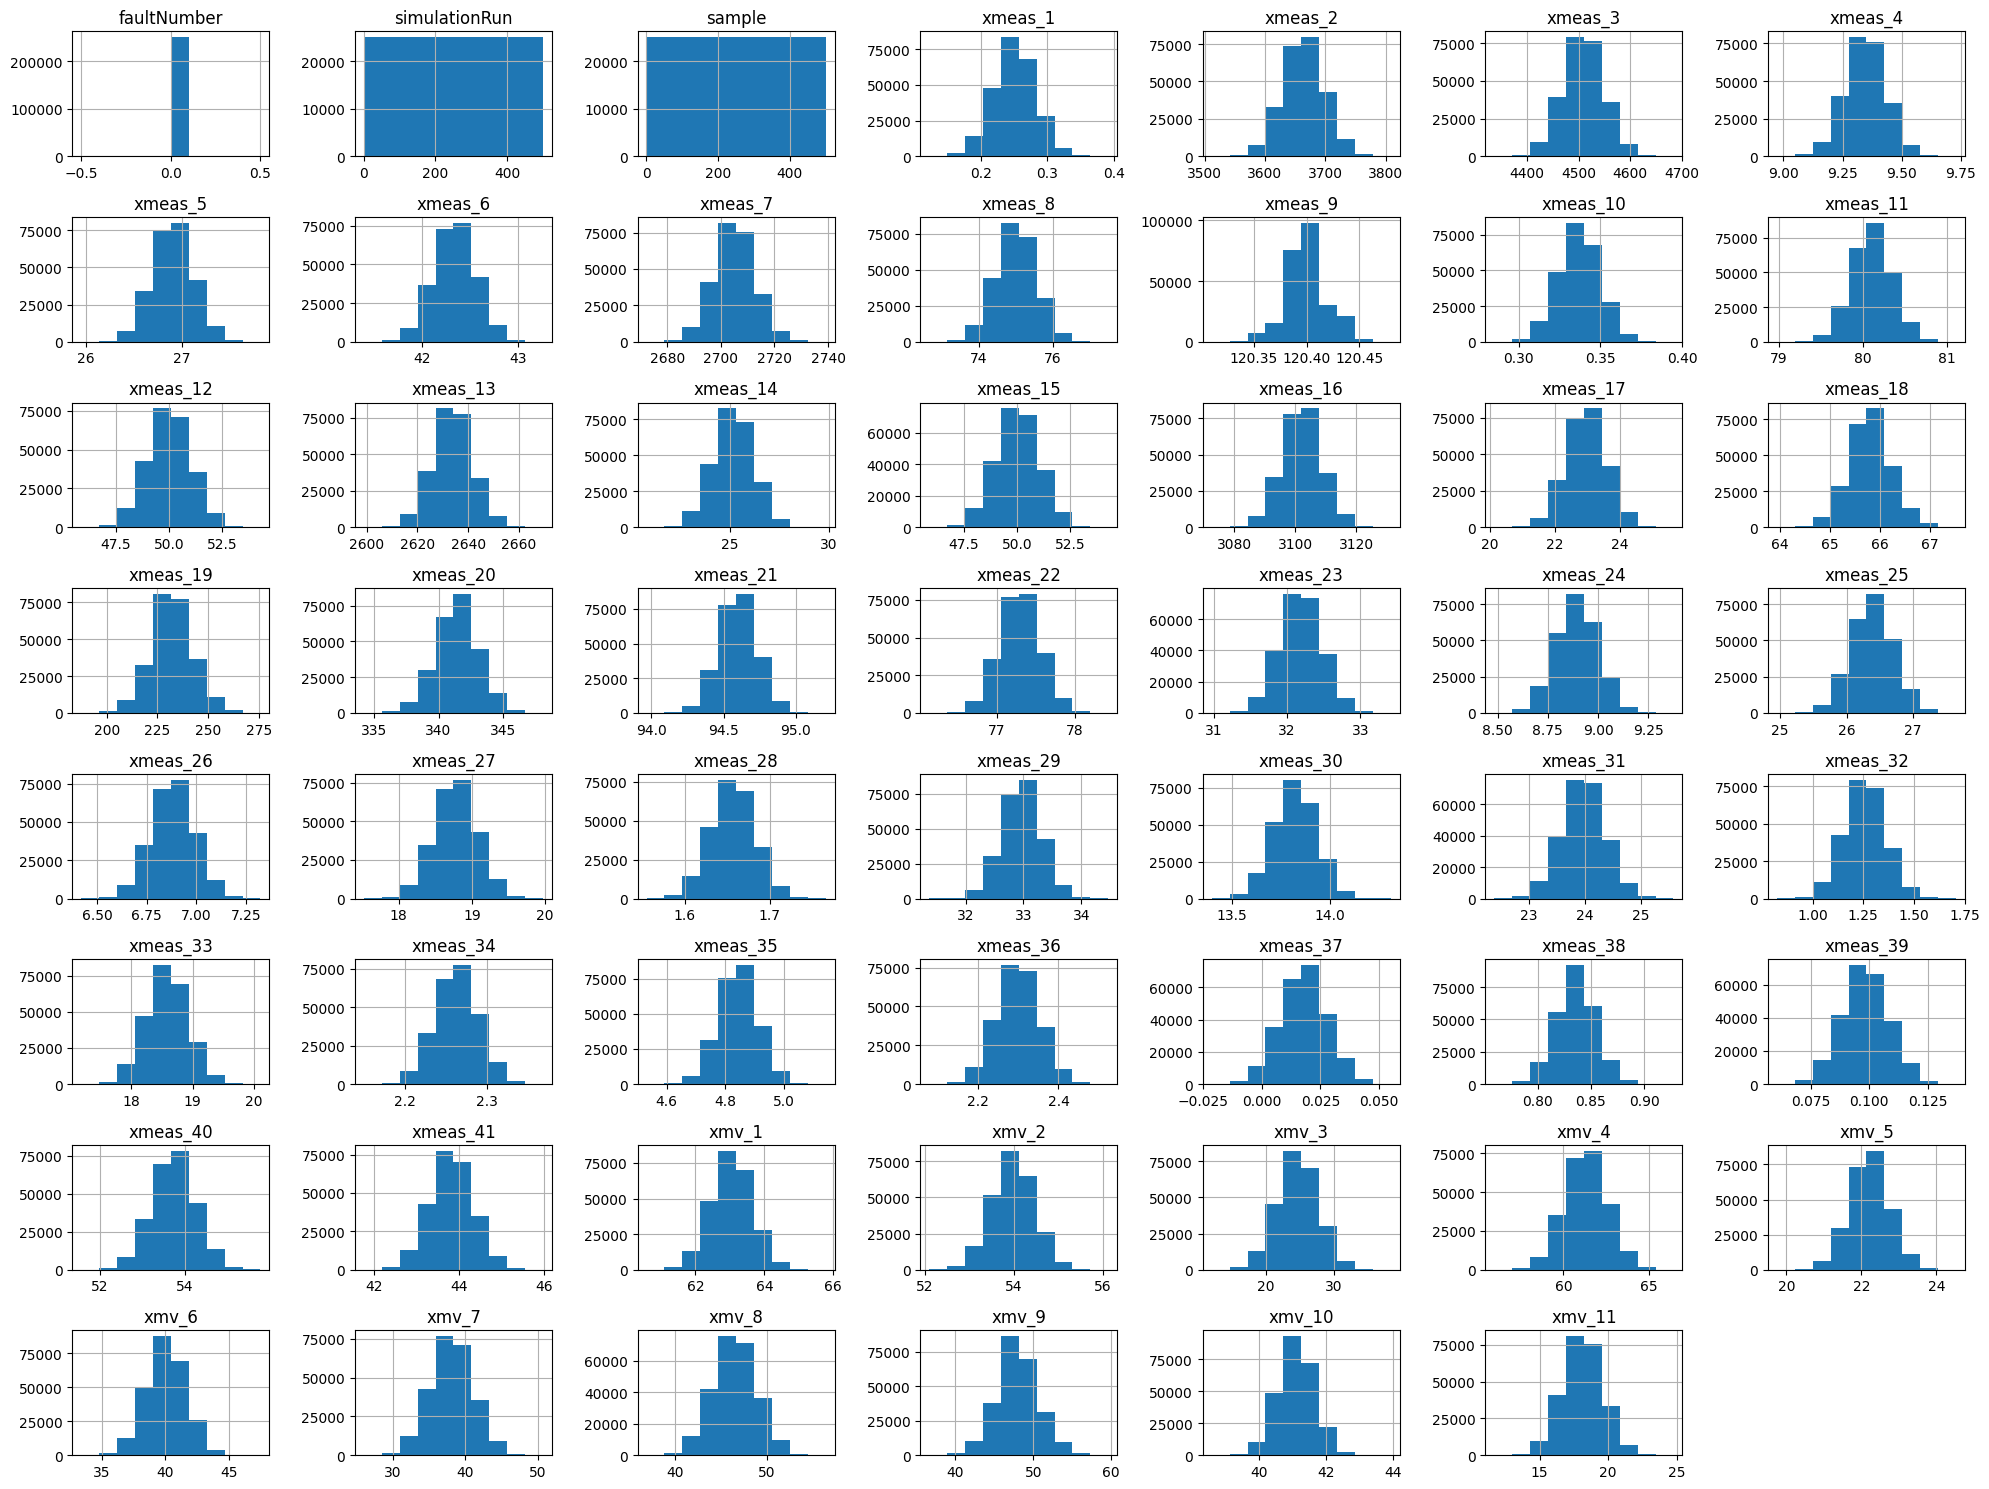

In [10]:
train_data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

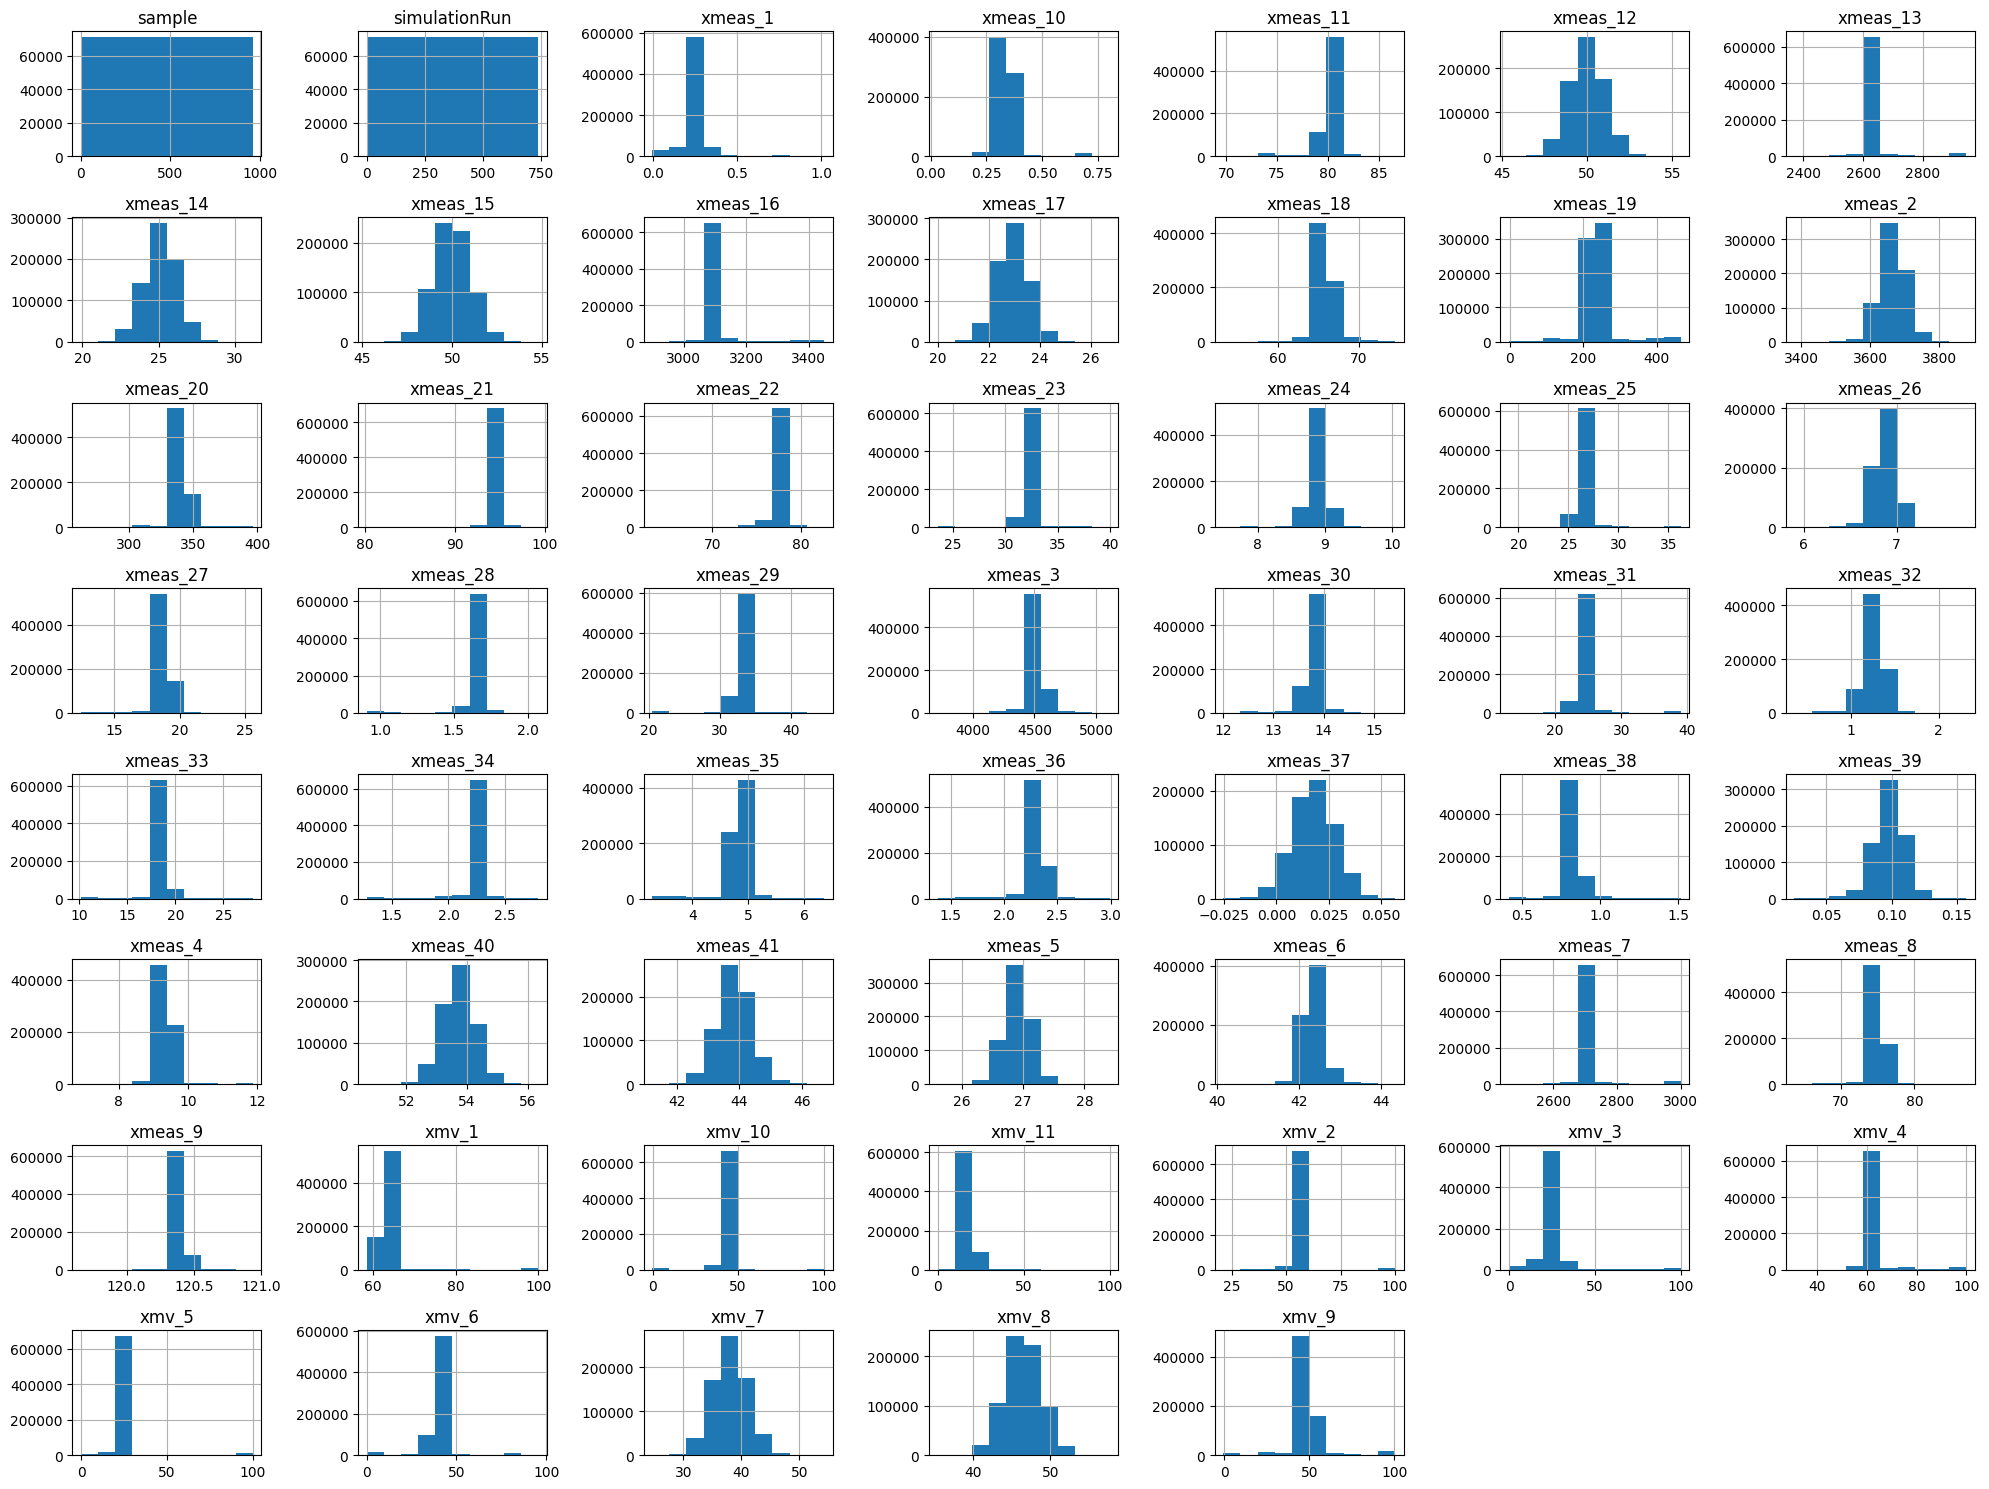

In [11]:
test_data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

In [13]:
fig = px.line(train_data[["simulationRun"]].iloc[:5000], title='simulationRun Plot')
fig.show()

In [14]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])

fig1 = px.line(train_data[["simulationRun"]].iloc[:5000])
fig2 = px.line(train_data[["sample"]].iloc[:5000])
fig2.update_traces(yaxis="y2")

subfig.layout.yaxis.title="index"
subfig.layout.yaxis.title="simulationRun"
subfig.layout.yaxis2.title="sample"
subfig.layout.title = "simulationRun and sample plot" 
subfig.add_traces(fig1.data + fig2.data)
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

위에서 확인한 것 처럼, 1개의 `simulationRun` 은 `500` 개의 `sample` 로 이루어져 있으므로, 임의의 `simulationRun==1` 값에 대해 `xmeas`, `xmv` 값을 시각화 합니다.

In [15]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])

fig1 = px.line(train_data.query("simulationRun == 1")[["xmeas_1"]])
fig2 = px.line(train_data.query("simulationRun == 1")[["xmv_1"]])
fig2.update_traces(yaxis="y2")

subfig.layout.yaxis.title="index"
subfig.layout.yaxis.title="xmeas_1"
subfig.layout.yaxis2.title="xmv_1"
subfig.layout.title = "xmeas_1 and xmv_1 plot for simulationRun == 1" 
subfig.add_traces(fig1.data + fig2.data)
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

- 센서 값(`xmeas`, `xmv`) 들의 변수간 상관 관계를 이해하기 위해, Corrleation Matrix 를 시각화 합니다.
- Correlation 의 값이 0(초록색)에 가까울 수록, 변수간 상관 관계가 적다는 것을 뜻합니다.
- 반대로, Correlation 의 값이 1(노란색) 또는 -1(남색) 에 가까울 수록, 양 또는 음의 상관 관계가 강하게 나타남을 의미합니다.
- 일부 변수들 끼리 양, 음의 상관 관계가 강하게 나타남을 알 수 있습니다.

In [16]:
# 학습 데이터의 상관관계를 계산합니다.
correlation_matrix = train_data.corr()

# Plotly 를 이용하여 Heatmap 을 그립니다.
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale='Viridis',
        text=correlation_matrix.round(2),  # 상관관계를 소수점 2자리 까지 표시합니다.
        hoverinfo='text',
    )
)
fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=800, height=800
)
fig.show()

In [17]:
# 보기 편하게 상관관계가 존재하는 것만 Plot에 표시
correlation_matrix = correlation_matrix[(correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)]

# Plotly 를 이용하여 Heatmap 을 그립니다.
fig = go.Figure(
    data=go.Heatmap(
        z=np.tril(correlation_matrix.values).T, # 하삼각행렬만 표시
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale='Viridis',
        text=correlation_matrix.round(4),  # 상관관계를 소수점 2자리 까지 표시합니다.
        hoverinfo='text',
    )
)
fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=800, height=800
)
fig.show()

`xmv_11`과 `xmeas_17`은 다른 변수와는 상관관계가 거의 없지만 둘 간의 상관관계는 -1로 완벽한 음의 상관관계를 지닌다.

In [18]:
# correlation matrix 의 diagonal 을 제외한 upper triangle 값을 추출합니다.
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# (NxN) -> (N^2 X 1) 로 변환(stack) 후, pandas dataframe 을 만듭니다. 
correlation_df = upper_triangle.stack().reset_index().rename(columns={0: "correlation_value"})

In [19]:
correlation_df

level_0   level_1  correlation_value
0     xmeas_1  xmeas_20          -0.369123
1     xmeas_1  xmeas_33           0.311790
2     xmeas_1  xmeas_38           0.413097
3     xmeas_1     xmv_3           0.996587
4     xmeas_1     xmv_5          -0.370598
..        ...       ...                ...
102  xmeas_35     xmv_5          -0.342506
103  xmeas_38     xmv_3           0.413003
104  xmeas_38     xmv_5          -0.514553
105     xmv_1    xmv_10           0.325416
106     xmv_3     xmv_5          -0.370560

[107 rows x 3 columns]

In [20]:
top_5_correlations = correlation_df.sort_values(by="correlation_value", ascending=False)[:5]
print(top_5_correlations)

     level_0   level_1  correlation_value
41  xmeas_12     xmv_7           1.000000
54  xmeas_15     xmv_8           1.000000
15   xmeas_7  xmeas_13           0.997386
3    xmeas_1     xmv_3           0.996587
73  xmeas_19     xmv_9           0.986063


In [21]:
def plot_pairs(data1:pd.DataFrame, data2:pd.DataFrame, correlation_value:float):
    subfig = make_subplots(specs=[[{"secondary_y": True}]])

    fig1 = px.line(data1)
    fig2 = px.line(data2)
    fig2.update_traces(yaxis="y2")
    
    name1 = data1.columns.item()
    name2 = data2.columns.item()
    subfig.layout.yaxis.title="index"
    subfig.layout.yaxis.title= name1
    subfig.layout.yaxis2.title= name2
    subfig.layout.title = f"{name1} and {name2} plot (Correlation : {correlation_value:.4f})" 
    subfig.add_traces(fig1.data + fig2.data)
    subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
    subfig.show()

- `simulationRun == 1` 인 데이터에 대해 시각화한 결과, 상관 관계가 높은 데이터가 다수 존재함을 알 수 있습니다.
  - `xmeas_12` 와 `xmv_7` 처럼 상관 관계가 `1` 인 데이터는 scale 차이는 있으나, 증/감 패턴이 완전하게 동일합니다.
  - `xmeas_19` 와 `xmv_9` 처럼 상관 관계가 `1` 에 가까운 데이터도 또한 데이터 증/감 패턴이 매우 유사합니다.

In [22]:
plot_data = train_data.query("simulationRun == 1")
for _, row in top_5_correlations.iterrows():
    plot_pairs(plot_data[[row["level_0"]]], plot_data[[row["level_1"]]], correlation_value = row["correlation_value"])

In [23]:
bottom_5_correlations = correlation_df.sort_values(by="correlation_value")[:5]
print(bottom_5_correlations)

     level_0   level_1  correlation_value
65  xmeas_17    xmv_11          -0.999243
79  xmeas_20  xmeas_38          -0.581375
14   xmeas_7  xmeas_11          -0.576832
30  xmeas_11  xmeas_13          -0.565694
48  xmeas_13  xmeas_33          -0.565231


- 동일한 데이터에 대해 시각화한 결과, 상관 관계가 낮은 데이터가 일부 존재함을 알 수 있습니다.
  - `xmeas_17` 와 `xmv_11` 처럼 상관 관계가 `-1` 에 가까운 데이터는 데이터끼리 증/감 패턴이 반대로 나타나는 것을 알 수 있습니다.
  - `xmeas_20` 와 `xmeas_38` 처럼 상관 관계가 `-0.5814` 인 데이터는 증/감 패턴이 반대로 나타나는 양상이 일부분 보이는 것을 알 수 있습니다.

In [24]:
for _, row in bottom_5_correlations.iterrows():
    plot_pairs(plot_data[[row["level_0"]]], plot_data[[row["level_1"]]], correlation_value = row["correlation_value"])

### 고민해볼 사항 🤔
- 일반적인 ML Model 에서 상관관계가 거의 1인 변수들의 경우, 중복된 정보량을 담고 있으므로 학습에 제거하는 경우가 있습니다.
- 하지만 학습 데이터인 **정상 데이터 대해 상관 관계를 계산** 한 것이고, 비정상 데이터에선 동일 데이터의 상관관계가 달라질 수 있습니다.
- 실제 화학 공정에서 이상이 발생하는 경우는 특정 변수들과의 상관 관계가 깨지는 경우도 포함될 수 있습니다.
- 따라서, 상관 관계에 따라 변수를 선택할지 제거할지 결정할 땐 **모델의 성능**과 같이 고려하는 것이 바람직합니다.

### Hypothesis

1. Data Description에서 `xmv_*`과 `xmeas_*`는 서로 연관있는 것으로 보임 따라서 `xmv_*`와 `xmeas_*`의 관계 규명이 필요
2. 이상치에 대한 규명이 필요 `test dataset`에 관해서 이상치가 어떻게 규정되어 있는지 확인 (Data linkage 일어나는 거 아냐?? | 보류)
3. 상관관계가 명확히 존재하는 이상 PCA를 통해 Feature의 수를 줄일 수 있지 않을까?
4. FFT를 통한 주파수 영역 특성을 파악하는 것이 어떤 영향을 줄까?

### My EDA 01

* Heatmap에서 `xmeas_1`과 `xmv_3`는 상관계수가 1임 즉 `xmeas_1`과 `xmv_3`는 정비례 관계임

In [25]:
train_data

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  \
0               0.0            1.0       1  0.25038   3674.0   4529.0   
1               0.0            1.0       2  0.25109   3659.4   4556.6   
2               0.0            1.0       3  0.25038   3660.3   4477.8   
3               0.0            1.0       4  0.24977   3661.3   4512.1   
4               0.0            1.0       5  0.29405   3679.0   4497.0   
...             ...            ...     ...      ...      ...      ...   
249995          0.0          500.0     496  0.29325   3640.1   4473.0   
249996          0.0          500.0     497  0.29134   3625.7   4506.2   
249997          0.0          500.0     498  0.29438   3600.2   4478.3   
249998          0.0          500.0     499  0.25269   3683.5   4486.4   
249999          0.0          500.0     500  0.25214   3648.2   4467.8   

        xmeas_4  xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4  \
0        9.2320   26.889   42.402   2704.3  ...  53.744  24.657  62.544   
1        9.4264   26.721   42.576   2705.0  ...  53.414  24.588  59.259   
2        9.4426   26.875   42.070   2706.2  ...  54.357  24.666  61.275   
3        9.4776   26.758   42.063   2707.2  ...  53.946  24.725  59.856   
4        9.3381   26.889   42.650   2705.1  ...  53.658  28.797  60.717   
...         ...      ...      ...      ...  ...     ...     ...     ...   
249995   9.1949   26.867   42.379   2700.2  ...  53.429  29.249  60.773   
249996   9.2109   26.889   42.291   2700.6  ...  53.830  28.975  61.517   
249997   9.1957   26.820   42.448   2700.3  ...  54.163  28.676  61.656   
249998   9.2832   27.188   42.757   2697.4  ...  53.453  24.889  61.564   
249999   9.1344   26.886   42.534   2695.1  ...  53.676  24.943  61.254   

         xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0       22.137  39.935  42.323  47.757  47.510  41.258  18.447  
1       22.084  40.176  38.554  43.692  47.427  41.359  17.194  
2       22.380  40.244  38.990  46.699  47.468  41.199  20.530  
3       22.277  40.257  38.072  47.541  47.658  41.643  18.089  
4       21.947  39.144  41.955  47.645  47.346  41.507  18.461  
...        ...     ...     ...     ...     ...     ...     ...  
249995  21.532  40.451  34.064  48.953  48.291  40.812  18.756  
249996  21.750  42.762  42.645  51.055  48.589  40.933  19.360  
249997  21.487  42.109  39.770  46.770  48.648  41.465  19.344  
249998  21.392  39.334  42.274  43.623  48.797  39.835  18.512  
249999  21.208  38.991  42.873  44.400  48.876  41.076  16.158  

[250000 rows x 55 columns]

In [26]:
plot_data = train_data.query("simulationRun == 1")
plot_data

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0            0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1            0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2            0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3            0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4            0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   
..           ...            ...     ...      ...      ...      ...      ...   
495          0.0            1.0     496  0.24602   3651.9   4504.4   9.4721   
496          0.0            1.0     497  0.23457   3663.0   4529.5   9.3440   
497          0.0            1.0     498  0.23068   3656.4   4493.0   9.2978   
498          0.0            1.0     499  0.24263   3632.5   4521.5   9.3915   
499          0.0            1.0     500  0.23958   3629.7   4566.3   9.5071   

     xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0     26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1     26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2     26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3     26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4     26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   
..       ...      ...      ...  ...     ...     ...     ...     ...     ...   
495   26.600   42.312   2707.2  ...  54.132  23.663  59.588  22.481  38.952   
496   26.872   42.434   2704.1  ...  54.028  22.776  60.566  22.237  42.978   
497   26.920   42.536   2700.3  ...  54.465  23.158  62.102  21.639  42.483   
498   26.956   42.317   2701.9  ...  54.532  23.386  63.164  22.661  39.558   
499   27.219   42.757   2703.8  ...  53.996  23.686  59.553  22.749  40.036   

      xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0    42.323  47.757  47.510  41.258  18.447  
1    38.554  43.692  47.427  41.359  17.194  
2    38.990  46.699  47.468  41.199  20.530  
3    38.072  47.541  47.658  41.643  18.089  
4    41.955  47.645  47.346  41.507  18.461  
..      ...     ...     ...     ...     ...  
495  33.489  45.203  49.900  41.057  16.448  
496  38.017  42.637  50.075  41.339  17.435  
497  41.016  46.782  50.098  41.277  18.315  
498  37.892  47.468  50.312  40.557  19.198  
499  37.977  52.375  50.728  41.145  19.029  

[500 rows x 55 columns]

In [27]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])

fig1 = px.line(plot_data["xmeas_1"])
fig2 = px.line(plot_data["xmv_3"])
fig2.update_traces(yaxis="y2")

name1 = "xmeas_1"
name2 = "xmv_3"
subfig.layout.yaxis.title="index"
subfig.layout.yaxis.title= name1
subfig.layout.yaxis2.title= name2
subfig.layout.title = f"{name1} and {name2} plot" 
subfig.add_traces(fig1.data + fig2.data)
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

* 위의 Base EDA의 Heatmap 확인해보면 경향은 같지만 값의 범위가 다른 경우가 보임 따라서 표준화를 통해 값의 스케일 차이를 줄여주면 Co-relation은 어떻게 변할까?  
-> 어차피 평균을 0 표준 편차를 1로 만들어주는거라 범위만 변하지 분포는 변하지 않음 따라서 변화가 없음

In [28]:
def standardize(column):
    mean = column.mean()  
    std = column.std()    
    standardized_column = (column - mean) / std
    return standardized_column

df_scaled_train = train_data.copy()
df_scaled_train.iloc[:, 3:] = train_data.iloc[:, 3:].apply(standardize)


In [29]:
df_scaled_train

faultNumber  simulationRun  sample   xmeas_1   xmeas_2   xmeas_3  \
0               0.0            1.0       1 -0.003307  0.300364  0.514599   
1               0.0            1.0       2  0.019690 -0.128967  1.218404   
2               0.0            1.0       3 -0.003307 -0.102502 -0.791010   
3               0.0            1.0       4 -0.023065 -0.073095  0.083646   
4               0.0            1.0       5  1.411175  0.447396 -0.301407   
...             ...            ...     ...       ...       ...       ...   
249995          0.0          500.0     496  1.385263 -0.696508 -0.913411   
249996          0.0          500.0     497  1.323398 -1.119958 -0.066805   
249997          0.0          500.0     498  1.421864 -1.869818 -0.778260   
249998          0.0          500.0     499  0.071514  0.579724 -0.571709   
249999          0.0          500.0     500  0.053700 -0.458317 -1.046012   

         xmeas_4   xmeas_5   xmeas_6   xmeas_7  ...     xmv_2     xmv_3  \
0      -1.342731 -0.062398  0.294726 -0.098047  ... -0.489006  0.005770   
1       0.925080 -0.856779  1.091016 -0.005032  ... -1.191637 -0.016944   
2       1.114064 -0.128596 -1.224631  0.154424  ...  0.816185  0.008733   
3       1.522363 -0.681826 -1.256665  0.287304  ... -0.058910  0.028155   
4      -0.105001 -0.062398  1.429668  0.008256  ... -0.672116  1.368624   
...          ...       ...       ...       ...  ...       ...       ...   
249995 -1.775528 -0.166424  0.189470 -0.642855  ... -1.159699  1.517419   
249996 -1.588877 -0.062398 -0.213252 -0.589703  ... -0.305896  1.427220   
249997 -1.766196 -0.388662  0.505240 -0.629567  ...  0.403123  1.328792   
249998 -0.745448  1.351411  1.919340 -1.014918  ... -1.108599  0.082142   
249999 -2.481303 -0.076583  0.898808 -1.320542  ... -0.633791  0.099919   

           xmv_4     xmv_5     xmv_6     xmv_7     xmv_8     xmv_9    xmv_10  \
0       1.001362 -0.150228 -0.078897  1.424527  0.520011 -0.165134  0.284191   
1      -1.639727 -0.250199  0.078954  0.153478 -1.208816 -0.195688  0.470946   
2      -0.018895  0.308127  0.123493  0.300513  0.070048 -0.180595  0.175097   
3      -1.159749  0.113845  0.132008 -0.009071  0.428147 -0.110653  0.996077   
4      -0.467518 -0.508613 -0.596991  1.300424  0.472378 -0.225506  0.744606   
...          ...       ...       ...       ...       ...       ...       ...   
249995 -0.422495 -1.291401  0.259075 -1.360720  1.028665  0.122366 -0.540486   
249996  0.175670 -0.880202  1.772747  1.533118  1.922637  0.232065 -0.316751   
249997  0.287423 -1.376282  1.345041  0.563559  0.100244  0.253784  0.666945   
249998  0.213457 -1.555475 -0.472543  1.408003 -1.238162  0.308634 -2.347012   
249999 -0.035778 -1.902542 -0.697203  1.610008 -0.907707  0.337715 -0.052336   

          xmv_11  
0       0.224294  
1      -0.631769  
2       1.647422  
3      -0.020296  
4       0.233859  
...          ...  
249995  0.435406  
249996  0.848065  
249997  0.837134  
249998  0.268703  
249999 -1.339575  

[250000 rows x 55 columns]

In [30]:
plot_data = df_scaled_train.query("simulationRun==1")

In [31]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])

fig1 = px.line(plot_data["xmeas_1"])
fig2 = px.line(plot_data["xmv_3"])
fig2.update_traces(yaxis="y2")

name1 = "xmeas_1"
name2 = "xmv_3"
subfig.layout.yaxis.title="index"
subfig.layout.yaxis.title= name1
subfig.layout.yaxis2.title= name2
subfig.layout.title = f"{name1} and {name2} plot" 
subfig.add_traces(fig1.data + fig2.data)
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

### My EDA 02
* Data Description에서 `xmv_*`과 `xmeas_*`는 서로 연관있는 것으로 보임 따라서 `xmv_*`와 `xmeas_*`의 관계 규명이 필요

In [32]:
train_data

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  \
0               0.0            1.0       1  0.25038   3674.0   4529.0   
1               0.0            1.0       2  0.25109   3659.4   4556.6   
2               0.0            1.0       3  0.25038   3660.3   4477.8   
3               0.0            1.0       4  0.24977   3661.3   4512.1   
4               0.0            1.0       5  0.29405   3679.0   4497.0   
...             ...            ...     ...      ...      ...      ...   
249995          0.0          500.0     496  0.29325   3640.1   4473.0   
249996          0.0          500.0     497  0.29134   3625.7   4506.2   
249997          0.0          500.0     498  0.29438   3600.2   4478.3   
249998          0.0          500.0     499  0.25269   3683.5   4486.4   
249999          0.0          500.0     500  0.25214   3648.2   4467.8   

        xmeas_4  xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4  \
0        9.2320   26.889   42.402   2704.3  ...  53.744  24.657  62.544   
1        9.4264   26.721   42.576   2705.0  ...  53.414  24.588  59.259   
2        9.4426   26.875   42.070   2706.2  ...  54.357  24.666  61.275   
3        9.4776   26.758   42.063   2707.2  ...  53.946  24.725  59.856   
4        9.3381   26.889   42.650   2705.1  ...  53.658  28.797  60.717   
...         ...      ...      ...      ...  ...     ...     ...     ...   
249995   9.1949   26.867   42.379   2700.2  ...  53.429  29.249  60.773   
249996   9.2109   26.889   42.291   2700.6  ...  53.830  28.975  61.517   
249997   9.1957   26.820   42.448   2700.3  ...  54.163  28.676  61.656   
249998   9.2832   27.188   42.757   2697.4  ...  53.453  24.889  61.564   
249999   9.1344   26.886   42.534   2695.1  ...  53.676  24.943  61.254   

         xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0       22.137  39.935  42.323  47.757  47.510  41.258  18.447  
1       22.084  40.176  38.554  43.692  47.427  41.359  17.194  
2       22.380  40.244  38.990  46.699  47.468  41.199  20.530  
3       22.277  40.257  38.072  47.541  47.658  41.643  18.089  
4       21.947  39.144  41.955  47.645  47.346  41.507  18.461  
...        ...     ...     ...     ...     ...     ...     ...  
249995  21.532  40.451  34.064  48.953  48.291  40.812  18.756  
249996  21.750  42.762  42.645  51.055  48.589  40.933  19.360  
249997  21.487  42.109  39.770  46.770  48.648  41.465  19.344  
249998  21.392  39.334  42.274  43.623  48.797  39.835  18.512  
249999  21.208  38.991  42.873  44.400  48.876  41.076  16.158  

[250000 rows x 55 columns]

In [33]:
xmeas = []
xmv = []

for col_name in train_data.columns:
    if "xmeas" in col_name:
        xmeas.append(col_name)
    elif "xmv" in col_name:
        xmv.append(col_name)
    else :
        continue

In [34]:
len(xmv), len(xmeas)

(11, 41)

In [35]:
plot_varience = []

for xmv_num in xmv :
    for xmeas_num in xmeas:
        plot_varience.append((xmv_num, xmeas_num))


In [36]:
len(plot_varience)

451

In [37]:
# def make_plots(data : pd.DataFrame,run_num : int, varience : tuple) :
#     plot_data = data.query(f"simulationRun=={run_num}")
    
#     subfig = make_subplots(specs=[[{"secondary_y":True}]])
    
#     fig1 = px.line(plot_data[varience[0]])
#     fig2 = px.line(plot_data[varience[1]])
#     fig2.update_traces(yaxis="y2")
    
#     name1 = varience[0]
#     name2 = varience[1]
#     subfig.layout.yaxis.title = "index"
#     subfig.layout.yaxis.title = name1
#     subfig.layout.yaxis.title = name2
#     subfig.layout.title = f"{name1} and {name2} plot"
#     subfig.add_traces(fig1.data + fig2.data)
#     subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
#     subfig.show()

In [38]:
# # xmeas와 xmv 간의 관계 (451개의 Plot)
# for varience in plot_varience :
#     make_plots(train_data, 1, varience)

In [39]:
df_scaled_train

faultNumber  simulationRun  sample   xmeas_1   xmeas_2   xmeas_3  \
0               0.0            1.0       1 -0.003307  0.300364  0.514599   
1               0.0            1.0       2  0.019690 -0.128967  1.218404   
2               0.0            1.0       3 -0.003307 -0.102502 -0.791010   
3               0.0            1.0       4 -0.023065 -0.073095  0.083646   
4               0.0            1.0       5  1.411175  0.447396 -0.301407   
...             ...            ...     ...       ...       ...       ...   
249995          0.0          500.0     496  1.385263 -0.696508 -0.913411   
249996          0.0          500.0     497  1.323398 -1.119958 -0.066805   
249997          0.0          500.0     498  1.421864 -1.869818 -0.778260   
249998          0.0          500.0     499  0.071514  0.579724 -0.571709   
249999          0.0          500.0     500  0.053700 -0.458317 -1.046012   

         xmeas_4   xmeas_5   xmeas_6   xmeas_7  ...     xmv_2     xmv_3  \
0      -1.342731 -0.062398  0.294726 -0.098047  ... -0.489006  0.005770   
1       0.925080 -0.856779  1.091016 -0.005032  ... -1.191637 -0.016944   
2       1.114064 -0.128596 -1.224631  0.154424  ...  0.816185  0.008733   
3       1.522363 -0.681826 -1.256665  0.287304  ... -0.058910  0.028155   
4      -0.105001 -0.062398  1.429668  0.008256  ... -0.672116  1.368624   
...          ...       ...       ...       ...  ...       ...       ...   
249995 -1.775528 -0.166424  0.189470 -0.642855  ... -1.159699  1.517419   
249996 -1.588877 -0.062398 -0.213252 -0.589703  ... -0.305896  1.427220   
249997 -1.766196 -0.388662  0.505240 -0.629567  ...  0.403123  1.328792   
249998 -0.745448  1.351411  1.919340 -1.014918  ... -1.108599  0.082142   
249999 -2.481303 -0.076583  0.898808 -1.320542  ... -0.633791  0.099919   

           xmv_4     xmv_5     xmv_6     xmv_7     xmv_8     xmv_9    xmv_10  \
0       1.001362 -0.150228 -0.078897  1.424527  0.520011 -0.165134  0.284191   
1      -1.639727 -0.250199  0.078954  0.153478 -1.208816 -0.195688  0.470946   
2      -0.018895  0.308127  0.123493  0.300513  0.070048 -0.180595  0.175097   
3      -1.159749  0.113845  0.132008 -0.009071  0.428147 -0.110653  0.996077   
4      -0.467518 -0.508613 -0.596991  1.300424  0.472378 -0.225506  0.744606   
...          ...       ...       ...       ...       ...       ...       ...   
249995 -0.422495 -1.291401  0.259075 -1.360720  1.028665  0.122366 -0.540486   
249996  0.175670 -0.880202  1.772747  1.533118  1.922637  0.232065 -0.316751   
249997  0.287423 -1.376282  1.345041  0.563559  0.100244  0.253784  0.666945   
249998  0.213457 -1.555475 -0.472543  1.408003 -1.238162  0.308634 -2.347012   
249999 -0.035778 -1.902542 -0.697203  1.610008 -0.907707  0.337715 -0.052336   

          xmv_11  
0       0.224294  
1      -0.631769  
2       1.647422  
3      -0.020296  
4       0.233859  
...          ...  
249995  0.435406  
249996  0.848065  
249997  0.837134  
249998  0.268703  
249999 -1.339575  

[250000 rows x 55 columns]

In [40]:
import plotly.graph_objects as go

fig = go.Figure()
features = plot_data.columns[3:]
plot_data = df_scaled_train.query("simulationRun==1")

for f in features :
    if "xmeas" in f :
        fig.add_trace(go.Line(x=plot_data["sample"], y=plot_data[f], name=f, line=dict(color='red', width=2, dash='solid')))
    else :
        fig.add_trace(go.Line(x=plot_data["sample"], y=plot_data[f], name=f, line=dict(color='blue', width=2, dash='solid')))
    
fig.update_layout(width = 1400, height = 800, title='Train Standardization Senser Data (simulationRun==1, Line Plot)', xaxis_title='sample', yaxis_title='value')

fig.show()

/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### FFT

In [47]:
train_run1 = train_data.query("simulationRun==1")
np_train_run1_xmeas_1 = train_run1["xmeas_1"]

In [48]:
fft_run1_xmeas_1 = np.fft.fft(np_train_run1_xmeas_1)
N = len(fft_run1_xmeas_1) // 2
freq = np.fft.fftfreq(len(fft_run1_xmeas_1), 1/500)[:N]  # 주파수 벡터
X_magnitude = 2 * np.abs(fft_run1_xmeas_1[:N]) / len(np_train_run1_xmeas_1)  # 정규화된 주파수 영역에서의 신호 강도

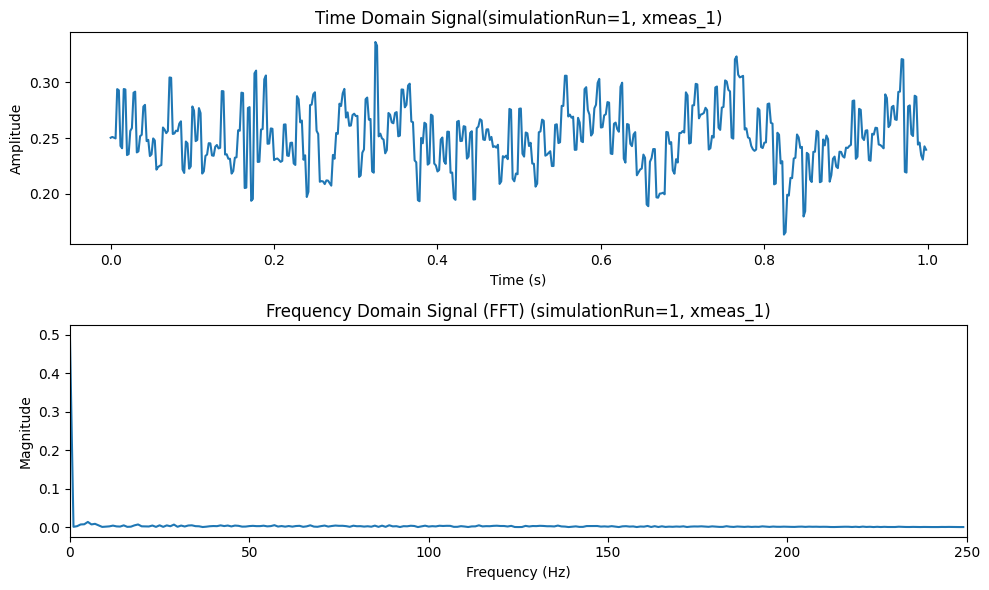

In [49]:
# 결과 시각화
t = np.arange(0, 1, 1/500)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, np_train_run1_xmeas_1)
plt.title('Time Domain Signal(simulationRun=1, xmeas_1)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, X_magnitude)
plt.title('Frequency Domain Signal (FFT) (simulationRun=1, xmeas_1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 500/2)  # 양쪽 대칭이므로 절반까지만 표시
plt.tight_layout()
plt.show()

In [62]:
def custom_fft(simul_run_number, var_name, dataset_type, data, Fs=500):
    T = 1 / Fs  # 샘플링 간격
    t = np.arange(0, 1, T)  # 시간 벡터 (1초간의 데이터)
    x = data

    # FFT 수행
    X = np.fft.fft(x)
    N = len(X) // 2  # 절반만 사용 (대칭성 때문)
    freq = np.fft.fftfreq(len(x), T)[:N]  # 주파수 벡터
    X_magnitude = 2 * np.abs(X[:N]) / len(x)  # 정규화된 주파수 영역에서의 신호 강도
    
    # 결과 시각화
    t = np.arange(0, 1, 1/Fs)
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, x)
    plt.title(f'Time Domain Signal({dataset_type}, simulationRun={simul_run_number}, {var_name})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(freq, X_magnitude)
    plt.title(f'Frequency Domain Signal (FFT) ({dataset_type}, simulationRun={simul_run_number}, {var_name})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, Fs/2)  # 양쪽 대칭이므로 절반까지만 표시
    plt.tight_layout()
    plt.show()

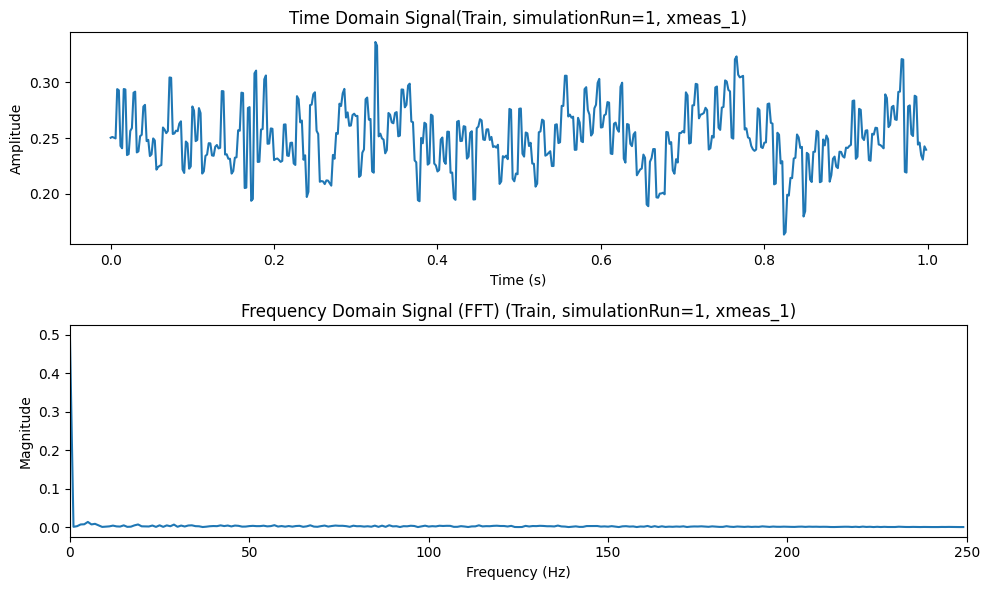

In [65]:
custom_fft(1, 'xmeas_1', 'Train', np_train_run1_xmeas_1)

In [57]:
test_fft = test_data.query("simulationRun==438")
test_run438_xmeas_1 = test_fft["xmeas_1"]

In [58]:
test_run438_xmeas_1

709440    0.24875
709441    0.25003
709442    0.25125
709443    0.25151
709444    0.23597
           ...   
710395    0.00000
710396    0.00000
710397    0.00000
710398    0.00000
710399    0.00000
Name: xmeas_1, Length: 960, dtype: float64

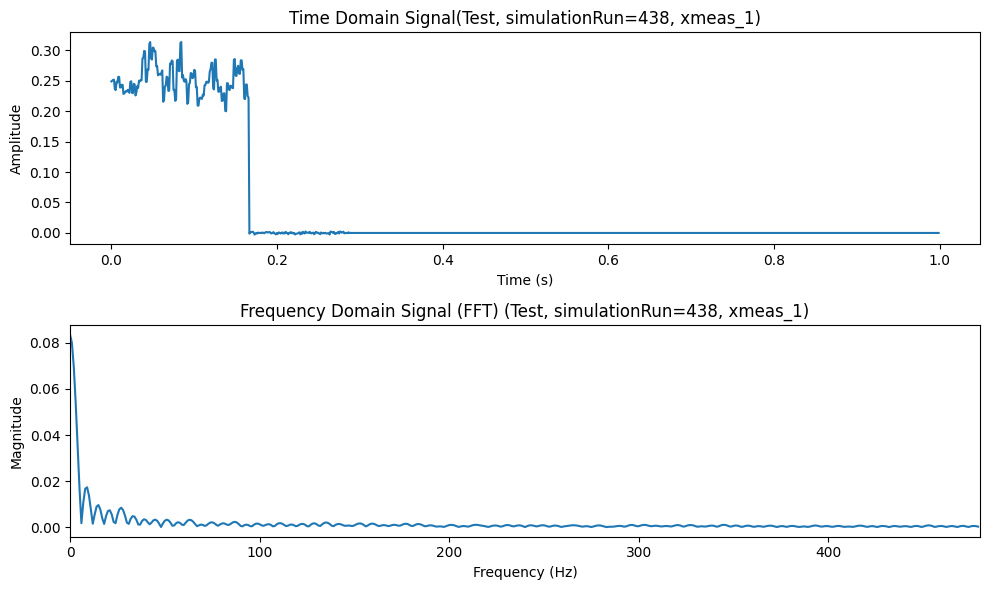

In [64]:
custom_fft(438, 'xmeas_1', 'Test', test_run438_xmeas_1, 960)

In [66]:
def custom_fft(data, Fs=500):
    T = 1 / Fs  # 샘플링 간격
    x = data

    # FFT 수행
    X = np.fft.fft(x)
    N = len(X) // 2  # 절반만 사용 (대칭성 때문)
    freq = np.fft.fftfreq(len(x), T)[:N]  # 주파수 벡터
    X_magnitude = 2 * np.abs(X[:N]) / len(x)  # 정규화된 주파수 영역에서의 신호 강도
    
    return freq, X_magnitude

In [67]:
train_data.query(f"simulationRun==1")

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0            0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1            0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2            0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3            0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4            0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   
..           ...            ...     ...      ...      ...      ...      ...   
495          0.0            1.0     496  0.24602   3651.9   4504.4   9.4721   
496          0.0            1.0     497  0.23457   3663.0   4529.5   9.3440   
497          0.0            1.0     498  0.23068   3656.4   4493.0   9.2978   
498          0.0            1.0     499  0.24263   3632.5   4521.5   9.3915   
499          0.0            1.0     500  0.23958   3629.7   4566.3   9.5071   

     xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0     26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1     26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2     26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3     26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4     26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   
..       ...      ...      ...  ...     ...     ...     ...     ...     ...   
495   26.600   42.312   2707.2  ...  54.132  23.663  59.588  22.481  38.952   
496   26.872   42.434   2704.1  ...  54.028  22.776  60.566  22.237  42.978   
497   26.920   42.536   2700.3  ...  54.465  23.158  62.102  21.639  42.483   
498   26.956   42.317   2701.9  ...  54.532  23.386  63.164  22.661  39.558   
499   27.219   42.757   2703.8  ...  53.996  23.686  59.553  22.749  40.036   

      xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0    42.323  47.757  47.510  41.258  18.447  
1    38.554  43.692  47.427  41.359  17.194  
2    38.990  46.699  47.468  41.199  20.530  
3    38.072  47.541  47.658  41.643  18.089  
4    41.955  47.645  47.346  41.507  18.461  
..      ...     ...     ...     ...     ...  
495  33.489  45.203  49.900  41.057  16.448  
496  38.017  42.637  50.075  41.339  17.435  
497  41.016  46.782  50.098  41.277  18.315  
498  37.892  47.468  50.312  40.557  19.198  
499  37.977  52.375  50.728  41.145  19.029  

[500 rows x 55 columns]

In [74]:
simulrun_num = 500
columns = train_data.columns[3:]
df_train_fft = pd.DataFrame()
for i in range(1, simulrun_num+1) :
    temp_data = train_data.query(f"simulationRun=={i}")
    temp_df = pd.DataFrame(data=temp_data.iloc[:250,:2])
    for col in columns:
        freq, X_magnitude = custom_fft(temp_data[col])
        temp_df["frequency"] = freq
        temp_df[f"fft_{col}"] = X_magnitude
    df_train_fft = pd.concat([df_train_fft, temp_df], axis=0)
        

In [75]:
df_train_fft

faultNumber  simulationRun  frequency  fft_xmeas_1  fft_xmeas_2  \
0               0.0            1.0        0.0     0.501178  7325.546400   
1               0.0            1.0        1.0     0.000752     4.526369   
2               0.0            1.0        2.0     0.002330     2.349973   
3               0.0            1.0        3.0     0.006877     4.814689   
4               0.0            1.0        4.0     0.007358     3.156441   
...             ...            ...        ...          ...          ...   
249745          0.0          500.0      245.0     0.000202     1.833246   
249746          0.0          500.0      246.0     0.000427     0.462912   
249747          0.0          500.0      247.0     0.000315     0.661923   
249748          0.0          500.0      248.0     0.000063     1.565401   
249749          0.0          500.0      249.0     0.000082     1.128621   

        fft_xmeas_3  fft_xmeas_4  fft_xmeas_5  fft_xmeas_6  fft_xmeas_7  ...  \
0       9019.154400    18.689608    53.814116    84.681352  5408.714000  ...   
1          3.402344     0.002948     0.007030     0.024190     1.927882  ...   
2          8.673947     0.005620     0.009856     0.036008     0.370777  ...   
3          5.122162     0.004394     0.029235     0.022094     3.546120  ...   
4          4.188570     0.013304     0.010559     0.025088     2.576022  ...   
...             ...          ...          ...          ...          ...  ...   
249745     3.840056     0.006691     0.027326     0.021443     0.052610  ...   
249746     3.347884     0.004726     0.028994     0.014317     0.035200  ...   
249747     0.951215     0.010259     0.018008     0.021219     0.036093  ...   
249748     1.029130     0.008768     0.004268     0.022667     0.085372  ...   
249749     0.974314     0.005132     0.023713     0.003710     0.031031  ...   

         fft_xmv_2  fft_xmv_3   fft_xmv_4  fft_xmv_5  fft_xmv_6  fft_xmv_7  \
0       107.919100  49.308712  122.475392  44.314964  80.213228  76.562196   
1         0.070607   0.089661    0.099426   0.111237   0.430592   0.342589   
2         0.024485   0.235883    0.076024   0.021169   0.376917   0.084605   
3         0.045592   0.674393    0.150601   0.169055   0.370470   0.215127   
4         0.064300   0.771912    0.151730   0.081547   0.149465   0.173407   
...            ...        ...         ...        ...        ...        ...   
249745    0.038768   0.030999    0.006269   0.024029   0.016593   0.226047   
249746    0.035228   0.003990    0.082366   0.016547   0.029187   0.143350   
249747    0.012512   0.008350    0.036396   0.009107   0.026206   0.237434   
249748    0.011901   0.010544    0.138716   0.028861   0.018880   0.311440   
249749    0.012425   0.006257    0.032412   0.014906   0.015964   0.254460   

        fft_xmv_8  fft_xmv_9  fft_xmv_10  fft_xmv_11  
0       93.257728  98.015352   82.203872   36.185176  
1        0.272756   0.390885    0.023580    0.041204  
2        0.204325   0.778407    0.012427    0.116941  
3        0.412854   1.799614    0.028369    0.120381  
4        0.303674   1.039463    0.011220    0.146758  
...           ...        ...         ...         ...  
249745   0.154483   0.008574    0.039773    0.031543  
249746   0.136982   0.009478    0.099069    0.107900  
249747   0.211975   0.011024    0.104466    0.049242  
249748   0.069055   0.009999    0.112151    0.062206  
249749   0.023469   0.014456    0.011308    0.021306  

[125000 rows x 55 columns]

In [76]:
fig = go.Figure()
plot_data = df_train_fft.query("simulationRun==1")
features = plot_data.columns[3:]

for f in features :
    if "fft_xmeas" in f :
        fig.add_trace(go.Line(x=plot_data["frequency"], y=plot_data[f], name=f, line=dict(color='red', width=2, dash='solid')))
    else :
        fig.add_trace(go.Line(x=plot_data["frequency"], y=plot_data[f], name=f, line=dict(color='blue', width=2, dash='solid')))
    
fig.update_layout(width = 1400, height = 800, title='Senser Data', xaxis_title='sample', yaxis_title='value')

fig.show()

/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [70]:
fig = go.Figure()
plot_data = df_train_fft.query("simulationRun==1")
features = plot_data.columns[3:]

for f in features :
    if "fft_xmeas" in f :
        fig.add_trace(go.Bar(x=plot_data["frequency"], y=plot_data[f], name=f, marker_color = 'red'))
    else :
        fig.add_trace(go.Bar(x=plot_data["frequency"], y=plot_data[f], name=f, marker_color = 'blue'))
    
fig.update_layout(width = 1400, height = 800, title='Senser Data', xaxis_title='sample', yaxis_title='value')

fig.show()

In [77]:
simulrun_num = 740
columns = test_data.columns[2:]
df_test_fft = pd.DataFrame()
for i in range(0, simulrun_num) :
    temp_data = test_data.query(f"simulationRun=={i}")
    temp_df = pd.DataFrame(data=temp_data.iloc[:480,:2])
    for col in columns:
        freq, X_magnitude = custom_fft(temp_data[col], 960)
        temp_df["frequency"] = freq
        temp_df[f"fft_{col}"] = X_magnitude
    df_test_fft = pd.concat([df_test_fft, temp_df], axis=0)

In [78]:
df_test_fft

sample  simulationRun  frequency  fft_xmeas_1  fft_xmeas_10  \
593280       1              0        0.0     0.500780      0.673938   
593281       2              0        1.0     0.000433      0.000365   
593282       3              0        2.0     0.000620      0.000919   
593283       4              0        3.0     0.001817      0.002601   
593284       5              0        4.0     0.001080      0.002038   
...        ...            ...        ...          ...           ...   
703195     476            739      475.0     0.000099      0.000196   
703196     477            739      476.0     0.000054      0.000095   
703197     478            739      477.0     0.000132      0.000115   
703198     479            739      478.0     0.000030      0.000067   
703199     480            739      479.0     0.000136      0.000122   

        fft_xmeas_11  fft_xmeas_12  fft_xmeas_13  fft_xmeas_14  fft_xmeas_15  \
593280    160.248087     99.981967   5266.577917     50.259306     99.953185   
593281      0.004978      0.077265      0.309632      0.046875      0.152036   
593282      0.056003      0.035379      1.906595      0.021934      0.048046   
593283      0.052444      0.055049      1.776702      0.034098      0.099208   
593284      0.035945      0.025535      1.251309      0.059167      0.140898   
...              ...           ...           ...           ...           ...   
703195      0.001779      0.044333      0.003914      0.040103      0.012152   
703196      0.001512      0.090522      0.034754      0.035840      0.056954   
703197      0.001402      0.075092      0.062630      0.060166      0.020087   
703198      0.003278      0.069799      0.111138      0.087130      0.026355   
703199      0.000967      0.171900      0.024136      0.061103      0.063289   

        ...  fft_xmv_10  fft_xmv_11   fft_xmv_2  fft_xmv_3   fft_xmv_4  \
593280  ...   82.208600   36.241656  107.909506  49.255969  122.655319   
593281  ...    0.036361    0.106967    0.023939   0.034568    0.084204   
593282  ...    0.030422    0.025308    0.077449   0.071352    0.055899   
593283  ...    0.017962    0.091488    0.049781   0.183662    0.034074   
593284  ...    0.039960    0.049744    0.038918   0.124367    0.130991   
...     ...         ...         ...         ...        ...         ...   
703195  ...    0.053601    0.062389    0.025448   0.007611    0.047894   
703196  ...    0.038559    0.049862    0.019338   0.004156    0.059372   
703197  ...    0.061991    0.012815    0.010222   0.009351    0.100946   
703198  ...    0.049774    0.065738    0.011925   0.002618    0.030249   
703199  ...    0.051368    0.023835    0.007686   0.013418    0.128200   

        fft_xmv_5  fft_xmv_6  fft_xmv_7  fft_xmv_8  fft_xmv_9  
593280  44.375892  80.109940  76.147000  92.959613  95.923310  
593281   0.053359   0.029638   0.227367   0.351856   0.751189  
593282   0.115879   0.069346   0.104203   0.111193   1.471948  
593283   0.120049   0.272301   0.161934   0.229617   0.435254  
593284   0.064154   0.247425   0.075143   0.326138   1.152977  
...           ...        ...        ...        ...        ...  
703195   0.015026   0.018870   0.130476   0.028186   0.007151  
703196   0.003956   0.014504   0.266392   0.131823   0.004023  
703197   0.011304   0.016106   0.221014   0.046434   0.015561  
703198   0.031591   0.007997   0.205459   0.060963   0.013472  
703199   0.013501   0.014553   0.505944   0.146466   0.008601  

[355200 rows x 55 columns]

In [79]:
fig = go.Figure()
plot_data = df_test_fft.query("simulationRun==0")
features = plot_data.columns[3:]

for f in features :
    if "fft_xmeas" in f :
        fig.add_trace(go.Line(x=plot_data["frequency"], y=plot_data[f], name=f, line=dict(color='red', width=2, dash='solid')))
    else :
        fig.add_trace(go.Line(x=plot_data["frequency"], y=plot_data[f], name=f, line=dict(color='blue', width=2, dash='solid')))
    
fig.update_layout(width = 1400, height = 800, title='Senser FFT Data (Test, Line Plot)', xaxis_title='sample', yaxis_title='value')

fig.show()

/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [76]:
fig = go.Figure()
plot_data = df_test_fft.query("simulationRun==0")
features = plot_data.columns[3:]

for f in features :
    if "fft_xmeas" in f :
        fig.add_trace(go.Bar(x=plot_data["frequency"], y=plot_data[f], name=f, marker_color = 'red'))
    else :
        fig.add_trace(go.Bar(x=plot_data["frequency"], y=plot_data[f], name=f, marker_color = 'blue'))
    
fig.update_layout(width = 1400, height = 800, title='Test Senser FFT Data (simulationRun=0, Bar Plot)', xaxis_title='sample', yaxis_title='value')

fig.show()

In [86]:
simulrun_num = 500
columns = df_scaled_train.columns[3:]
df_train_fft = pd.DataFrame()
for i in range(1, simulrun_num+1) :
    temp_data = df_scaled_train.query(f"simulationRun=={i}")
    temp_df = pd.DataFrame(data=temp_data.iloc[:250,:2])
    for col in columns:
        freq, X_magnitude = custom_fft(temp_data[col])
        temp_df["frequency"] = freq
        temp_df[f"fft_{col}"] = X_magnitude
    df_train_fft = pd.concat([df_train_fft, temp_df], axis=0)

In [87]:
fig = go.Figure()
plot_data = df_train_fft.query("simulationRun==1")
features = plot_data.columns[3:]

for f in features :
    if "fft_xmeas" in f :
        fig.add_trace(go.Line(x=plot_data["frequency"], y=plot_data[f], name=f, line=dict(color='red', width=2, dash='solid')))
    else :
        fig.add_trace(go.Line(x=plot_data["frequency"], y=plot_data[f], name=f, line=dict(color='blue', width=2, dash='solid')))
            
fig.update_layout(width = 1400, height = 800, title='Train Standardization Senser FFT Data (Line Plot)', xaxis_title='frequency', yaxis_title='value')

fig.show()

/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [88]:
fig = go.Figure()
plot_data = df_train_fft.query("simulationRun==1")
features = plot_data.columns[3:]

for f in features :
    if "fft_xmeas" in f :
        fig.add_trace(go.Bar(x=plot_data["frequency"], y=plot_data[f], name=f, marker_color = 'red'))
    else :
        fig.add_trace(go.Bar(x=plot_data["frequency"], y=plot_data[f], name=f, marker_color = 'blue'))
            
fig.update_layout(width = 1400, height = 800, title='Train Standardization Senser FFT Data (Bar Plot)', xaxis_title='frequency', yaxis_title='value')

fig.show()